In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/RNAseqHarm/Mayo_Differential_Expression_(diagnosis-sex).tsv', delimiter="\t")

In [3]:
df.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77748 entries, 0 to 77747
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Comparison                  77748 non-null  object 
 1   ensembl_gene_id             77748 non-null  object 
 2   logFC                       77748 non-null  float64
 3   CI.L                        77748 non-null  float64
 4   CI.R                        77748 non-null  float64
 5   AveExpr                     77748 non-null  float64
 6   t                           77748 non-null  float64
 7   P.Value                     77748 non-null  float64
 8   adj.P.Val                   77748 non-null  float64
 9   Direction                   77748 non-null  object 
 10  hgnc_symbol                 77748 non-null  object 
 11  percentage_gene_gc_content  77748 non-null  float64
 12  gene_biotype                77748 non-null  object 
 13  chromosome_name             777

In [5]:
df.head()

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
0,AD_female_CBE - CT_female_CBE,ENSG00000228521,1.583622,0.972199,2.195046,-2.452299,5.070954,5.643494e-07,0.000208,up,AC099552.3,60.690316,lncRNA,7,1043
1,AD_female_CBE - CT_female_CBE,ENSG00000163221,1.473149,0.452505,2.493792,-1.188227,2.824197,4.935087e-03,0.041105,up,S100A12,49.607535,protein_coding,1,1911
2,AD_female_CBE - CT_female_CBE,ENSG00000287689,1.449444,0.532722,2.366165,-0.391068,3.093881,2.089600e-03,0.024705,up,AC009704.3,40.367613,lncRNA,18,4298
3,AD_female_CBE - CT_female_CBE,ENSG00000124107,1.396432,0.246388,2.546476,-1.138710,2.375308,1.793055e-02,0.091020,none,SLPI,51.289768,protein_coding,20,2326
4,AD_female_CBE - CT_female_CBE,ENSG00000287865,1.390777,0.760834,2.020720,-2.984983,4.321027,1.886187e-05,0.001561,up,AC099552.5,53.001555,lncRNA,7,3215


In [6]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='P.Value').head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
21547,AD_female_TCX - CT_female_TCX,ENSG00000100227,0.490987,0.388074,0.593901,6.270899,9.388249,2.370846e-19,4.608214e-15,up,POLDIP3,49.097369,protein_coding,22,31242
58468,AD_male_TCX - CT_male_TCX,ENSG00000197256,1.054848,0.826009,1.283686,4.386951,9.028547,4.282315e-18,7.516963e-14,up,KANK2,52.981357,protein_coding,19,33525
58338,AD_male_TCX - CT_male_TCX,ENSG00000168743,1.476445,1.153468,1.799422,1.248550,8.952980,7.734695e-18,7.516963e-14,up,NPNT,38.072181,protein_coding,4,109253
19503,AD_female_TCX - CT_female_TCX,ENSG00000089169,-1.300886,-1.590023,-1.011750,8.111659,-8.804469,2.333255e-17,2.267574e-13,down,RPH3A,43.791819,protein_coding,12,328502
58328,AD_male_TCX - CT_male_TCX,ENSG00000231764,-1.616148,-1.980033,-1.252262,-0.586352,-8.693209,5.466568e-17,3.541789e-13,down,DLX6-AS1,42.593127,lncRNA,7,58925
19697,AD_female_TCX - CT_female_TCX,ENSG00000197256,0.937478,0.725929,1.149026,4.386951,8.679760,6.190178e-17,4.010616e-13,up,KANK2,52.981357,protein_coding,19,33525
19485,AD_female_TCX - CT_female_TCX,ENSG00000168743,1.367212,1.055955,1.678469,1.248550,8.602783,1.123438e-16,5.459065e-13,up,NPNT,38.072181,protein_coding,4,109253
19447,AD_female_TCX - CT_female_TCX,ENSG00000157005,-1.787567,-2.196264,-1.378871,-0.942674,-8.559819,1.501843e-16,5.838266e-13,down,SST,48.482805,protein_coding,3,1483
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089
19454,AD_female_TCX - CT_female_TCX,ENSG00000128564,-1.616262,-1.998917,-1.233608,2.847331,-8.263404,1.363093e-15,3.784920e-12,down,VGF,68.147664,protein_coding,7,3061


In [7]:
df.shape

(77748, 15)

In [8]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='logFC', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343
19441,AD_female_TCX - CT_female_TCX,ENSG00000163221,2.110461,1.280297,2.940624,-1.188227,4.974346,9.104204e-07,1.690147e-05,up,S100A12,49.607535,protein_coding,1,1911


In [9]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='logFC').head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089
58317,AD_male_TCX - CT_male_TCX,ENSG00000147571,-1.988353,-2.553590,-1.423117,-1.973015,-6.887452,1.768331e-11,1.041547e-08,down,CRH,55.098133,protein_coding,8,2089
58318,AD_male_TCX - CT_male_TCX,ENSG00000136750,-1.905762,-2.411594,-1.399929,5.334253,-7.369559,7.432880e-13,1.243646e-09,down,GAD2,42.668442,protein_coding,10,87894
19443,AD_female_TCX - CT_female_TCX,ENSG00000170290,-1.877883,-2.530201,-1.225566,0.564933,-5.635090,2.977468e-08,1.205689e-06,down,SLN,40.735628,protein_coding,11,12316
58320,AD_male_TCX - CT_male_TCX,ENSG00000168329,-1.875395,-2.450378,-1.300412,2.173998,-6.380406,4.128760e-10,1.130292e-07,down,CX3CR1,46.151738,protein_coding,3,18242
58321,AD_male_TCX - CT_male_TCX,ENSG00000101438,-1.793377,-2.318776,-1.267977,2.856158,-6.678222,6.640551e-11,2.933464e-08,down,SLC32A1,60.732556,protein_coding,20,4887
19447,AD_female_TCX - CT_female_TCX,ENSG00000157005,-1.787567,-2.196264,-1.378871,-0.942674,-8.559819,1.501843e-16,5.838266e-13,down,SST,48.482805,protein_coding,3,1483
19448,AD_female_TCX - CT_female_TCX,ENSG00000186081,-1.738384,-2.180218,-1.296551,-2.881616,-7.709662,7.232338e-14,6.111955e-11,down,KRT5,50.805910,protein_coding,12,5956
19450,AD_female_TCX - CT_female_TCX,ENSG00000136750,-1.724832,-2.194214,-1.255450,5.334253,-7.187874,2.502175e-12,8.385307e-10,down,GAD2,42.668442,protein_coding,10,87894
58325,AD_male_TCX - CT_male_TCX,ENSG00000104327,-1.721422,-2.475597,-0.967247,5.560456,-4.464217,1.000428e-05,1.713244e-04,down,CALB1,36.253662,protein_coding,8,36868


In [10]:
df['Comparison'].value_counts()

AD_female_CBE - CT_female_CBE    19437
AD_female_TCX - CT_female_TCX    19437
AD_male_CBE - CT_male_CBE        19437
AD_male_TCX - CT_male_TCX        19437
Name: Comparison, dtype: int64

In [11]:
df['score'] = np.sign(df['logFC']) * np.exp(np.abs(df['logFC'])) * -np.log10(df['adj.P.Val'])

In [12]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='logFC', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429,65.663885
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298,68.235848
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429,48.467145
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298,72.547958
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911,48.823374
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585,48.651806
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
19441,AD_female_TCX - CT_female_TCX,ENSG00000163221,2.110461,1.280297,2.940624,-1.188227,4.974346,9.104204e-07,1.690147e-05,up,S100A12,49.607535,protein_coding,1,1911,39.379361


In [13]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='score', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298,72.547958
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298,68.235848
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429,65.663885
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
58338,AD_male_TCX - CT_male_TCX,ENSG00000168743,1.476445,1.153468,1.799422,1.248550,8.952980,7.734695e-18,7.516963e-14,up,NPNT,38.072181,protein_coding,4,109253,57.448240
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911,48.823374
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585,48.651806
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429,48.467145


In [14]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('SNORD3A')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='adj.P.Val')

# Display the first 20 rows
df_filtered.head(20)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [15]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('XIST')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
35167,AD_female_TCX - CT_female_TCX,ENSG00000229807,-0.056104,-0.279690,0.167481,2.397148,-0.491372,0.623387,0.724861,none,XIST,39.781761,lncRNA,X,32075,-0.147810
72696,AD_male_TCX - CT_male_TCX,ENSG00000229807,-0.078222,-0.877898,0.721455,2.397148,-0.191545,0.848182,0.902706,none,XIST,39.781761,lncRNA,X,32075,-0.048071
7016,AD_female_CBE - CT_female_CBE,ENSG00000229807,-0.161216,-0.392643,0.070210,2.397148,-1.364128,0.173160,0.371738,none,XIST,39.781761,lncRNA,X,32075,-0.504946
40218,AD_male_CBE - CT_male_CBE,ENSG00000229807,-0.468008,-1.153659,0.217643,2.397148,-1.336623,0.181995,0.343200,none,XIST,39.781761,lncRNA,X,32075,-0.741643


In [16]:
df['Comparison'].value_counts()

AD_female_CBE - CT_female_CBE    19437
AD_female_TCX - CT_female_TCX    19437
AD_male_CBE - CT_male_CBE        19437
AD_male_TCX - CT_male_TCX        19437
Name: Comparison, dtype: int64

In [17]:
df_sig = df[df['adj.P.Val'] < 0.05]
df_sig.sort_values(by='logFC', ascending=False).head(20)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429,65.663885
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298,68.235848
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429,48.467145
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298,72.547958
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911,48.823374
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585,48.651806
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
19441,AD_female_TCX - CT_female_TCX,ENSG00000163221,2.110461,1.280297,2.940624,-1.188227,4.974346,9.104204e-07,1.690147e-05,up,S100A12,49.607535,protein_coding,1,1911,39.379361


In [18]:
# Define the function to apply to each group
def filter_func(group):
    # Add condition for adjusted p-value
    condition_met = group[(group['logFC'].abs() >= 0.2) & (group['adj.P.Val'] < 0.05)].shape[0]
    return condition_met >= 2

# Group the data by the gene id, and then apply the function to each group
df_filtered2 = df.groupby('ensembl_gene_id').filter(filter_func)


In [19]:
df_filtered2.sort_values(by='logFC', ascending=False).head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429,65.663885
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298,68.235848
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429,48.467145
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298,72.547958
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911,48.823374
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585,48.651806
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
19441,AD_female_TCX - CT_female_TCX,ENSG00000163221,2.110461,1.280297,2.940624,-1.188227,4.974346,9.104204e-07,1.690147e-05,up,S100A12,49.607535,protein_coding,1,1911,39.379361


In [20]:
df_filtered2.sort_values(by='logFC').head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089,-102.517084
58317,AD_male_TCX - CT_male_TCX,ENSG00000147571,-1.988353,-2.553590,-1.423117,-1.973015,-6.887452,1.768331e-11,1.041547e-08,down,CRH,55.098133,protein_coding,8,2089,-58.298846
58318,AD_male_TCX - CT_male_TCX,ENSG00000136750,-1.905762,-2.411594,-1.399929,5.334253,-7.369559,7.432880e-13,1.243646e-09,down,GAD2,42.668442,protein_coding,10,87894,-59.883961
19443,AD_female_TCX - CT_female_TCX,ENSG00000170290,-1.877883,-2.530201,-1.225566,0.564933,-5.635090,2.977468e-08,1.205689e-06,down,SLN,40.735628,protein_coding,11,12316,-38.706643
58320,AD_male_TCX - CT_male_TCX,ENSG00000168329,-1.875395,-2.450378,-1.300412,2.173998,-6.380406,4.128760e-10,1.130292e-07,down,CX3CR1,46.151738,protein_coding,3,18242,-45.316777
58321,AD_male_TCX - CT_male_TCX,ENSG00000101438,-1.793377,-2.318776,-1.267977,2.856158,-6.678222,6.640551e-11,2.933464e-08,down,SLC32A1,60.732556,protein_coding,20,4887,-45.268867
19447,AD_female_TCX - CT_female_TCX,ENSG00000157005,-1.787567,-2.196264,-1.378871,-0.942674,-8.559819,1.501843e-16,5.838266e-13,down,SST,48.482805,protein_coding,3,1483,-73.095221
19448,AD_female_TCX - CT_female_TCX,ENSG00000186081,-1.738384,-2.180218,-1.296551,-2.881616,-7.709662,7.232338e-14,6.111955e-11,down,KRT5,50.805910,protein_coding,12,5956,-58.097701
19450,AD_female_TCX - CT_female_TCX,ENSG00000136750,-1.724832,-2.194214,-1.255450,5.334253,-7.187874,2.502175e-12,8.385307e-10,down,GAD2,42.668442,protein_coding,10,87894,-50.933393
58325,AD_male_TCX - CT_male_TCX,ENSG00000104327,-1.721422,-2.475597,-0.967247,5.560456,-4.464217,1.000428e-05,1.713244e-04,down,CALB1,36.253662,protein_coding,8,36868,-21.062278


In [21]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('CRH')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC')

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089,-102.517084
58317,AD_male_TCX - CT_male_TCX,ENSG00000147571,-1.988353,-2.553590,-1.423117,-1.973015,-6.887452,1.768331e-11,1.041547e-08,down,CRH,55.098133,protein_coding,8,2089,-58.298846
59109,AD_male_TCX - CT_male_TCX,ENSG00000145708,-0.678347,-0.986726,-0.369968,1.433420,-4.309624,1.981138e-05,2.775715e-04,down,CRHBP,42.284983,protein_coding,5,28114,-7.008750
20629,AD_female_TCX - CT_female_TCX,ENSG00000145708,-0.612269,-0.898705,-0.325833,1.433420,-4.187806,3.346035e-05,2.997092e-04,down,CRHBP,42.284983,protein_coding,5,28114,-6.499121
25131,AD_female_TCX - CT_female_TCX,ENSG00000233954,-0.280315,-0.476084,-0.084546,3.348985,-2.809580,5.161032e-03,1.724514e-02,down,UQCRHL,46.926606,protein_coding,1,2180,-2.333854
25135,AD_female_TCX - CT_female_TCX,ENSG00000106113,-0.280165,-0.566248,0.005917,0.403910,-1.919977,5.544863e-02,1.150710e-01,none,CRHR2,53.243546,protein_coding,7,48188,-1.242669
64160,AD_male_TCX - CT_male_TCX,ENSG00000106113,-0.268160,-0.576318,0.039998,0.403910,-1.706060,8.863733e-02,1.781638e-01,none,CRHR2,53.243546,protein_coding,7,48188,-0.979596
27899,AD_female_TCX - CT_female_TCX,ENSG00000173660,-0.196334,-0.294282,-0.098387,7.508780,-3.948019,9.050678e-05,6.643430e-04,none,UQCRH,46.234422,protein_coding,1,13079,-3.866938
29491,AD_female_TCX - CT_female_TCX,ENSG00000120088,-0.158550,-0.475348,0.158248,-0.105029,-0.982980,3.261113e-01,4.529207e-01,none,CRHR1,54.730451,protein_coding,17,51549,-0.403077
69215,AD_male_TCX - CT_male_TCX,ENSG00000233954,-0.139154,-0.346916,0.068609,3.348985,-1.314214,1.893953e-01,3.149238e-01,none,UQCRHL,46.926606,protein_coding,1,2180,-0.576713


In [22]:
# Define the function to apply to each group
def filter_func(group):
    # Add condition for adjusted p-value
    condition_met = group[(group['logFC'].abs() >= 0.2) & (group['adj.P.Val'] < 0.05)].shape[0]
    return condition_met >= 2

# Define the list of comparisons of interest
comparisons = [
 'AD_female_CBE - CT_female_CBE',
'AD_female_TCX - CT_female_TCX', 
'AD_male_CBE - CT_male_CBE', 
'AD_male_TCX - CT_male_TCX',
]

# Filter the dataframe based on comparisons and p-value
df_filtered3 = df[df['Comparison'].isin(comparisons) & (df['adj.P.Val'] < 0.05)]

# Exclude rows where the comparison is between two females and the chromosome is Y
df_filtered3 = df_filtered3[~((df_filtered3['chromosome_name'] == 'Y') & (df_filtered3['Comparison'].str.contains('female')))]

# Group the filtered data by the gene id, and then apply the function to each group
df_filtered3 = df_filtered3.groupby('ensembl_gene_id').filter(filter_func)


In [23]:
df_filtered3.sort_values(by='logFC').head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089,-102.517084
58317,AD_male_TCX - CT_male_TCX,ENSG00000147571,-1.988353,-2.553590,-1.423117,-1.973015,-6.887452,1.768331e-11,1.041547e-08,down,CRH,55.098133,protein_coding,8,2089,-58.298846
58318,AD_male_TCX - CT_male_TCX,ENSG00000136750,-1.905762,-2.411594,-1.399929,5.334253,-7.369559,7.432880e-13,1.243646e-09,down,GAD2,42.668442,protein_coding,10,87894,-59.883961
19443,AD_female_TCX - CT_female_TCX,ENSG00000170290,-1.877883,-2.530201,-1.225566,0.564933,-5.635090,2.977468e-08,1.205689e-06,down,SLN,40.735628,protein_coding,11,12316,-38.706643
58320,AD_male_TCX - CT_male_TCX,ENSG00000168329,-1.875395,-2.450378,-1.300412,2.173998,-6.380406,4.128760e-10,1.130292e-07,down,CX3CR1,46.151738,protein_coding,3,18242,-45.316777
58321,AD_male_TCX - CT_male_TCX,ENSG00000101438,-1.793377,-2.318776,-1.267977,2.856158,-6.678222,6.640551e-11,2.933464e-08,down,SLC32A1,60.732556,protein_coding,20,4887,-45.268867
19447,AD_female_TCX - CT_female_TCX,ENSG00000157005,-1.787567,-2.196264,-1.378871,-0.942674,-8.559819,1.501843e-16,5.838266e-13,down,SST,48.482805,protein_coding,3,1483,-73.095221
19448,AD_female_TCX - CT_female_TCX,ENSG00000186081,-1.738384,-2.180218,-1.296551,-2.881616,-7.709662,7.232338e-14,6.111955e-11,down,KRT5,50.805910,protein_coding,12,5956,-58.097701
19450,AD_female_TCX - CT_female_TCX,ENSG00000136750,-1.724832,-2.194214,-1.255450,5.334253,-7.187874,2.502175e-12,8.385307e-10,down,GAD2,42.668442,protein_coding,10,87894,-50.933393
58325,AD_male_TCX - CT_male_TCX,ENSG00000104327,-1.721422,-2.475597,-0.967247,5.560456,-4.464217,1.000428e-05,1.713244e-04,down,CALB1,36.253662,protein_coding,8,36868,-21.062278


In [24]:
df_filtered3.sort_values(by='logFC', ascending=False).head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.138710,5.473894,7.096340e-08,4.105106e-06,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,1.134259e-06,up,OGN,36.683933,protein_coding,9,21429,65.663885
58312,AD_male_TCX - CT_male_TCX,ENSG00000287689,2.386350,1.606982,3.165718,-0.391068,5.991441,4.058354e-09,5.305286e-07,up,AC009704.3,40.367613,lncRNA,18,4298,68.235848
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,2.150670e-05,up,OGN,36.683933,protein_coding,9,21429,48.467145
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19438,AD_female_TCX - CT_female_TCX,ENSG00000287689,2.290877,1.589079,2.992674,-0.391068,6.387484,3.956327e-10,4.568401e-08,up,AC009704.3,40.367613,lncRNA,18,4298,72.547958
58315,AD_male_TCX - CT_male_TCX,ENSG00000163221,2.249423,1.425084,3.073763,-1.188227,5.339341,1.435993e-07,7.097191e-06,up,S100A12,49.607535,protein_coding,1,1911,48.823374
58316,AD_male_TCX - CT_male_TCX,ENSG00000115590,2.224004,1.418495,3.029513,-2.366382,5.403221,1.027871e-07,5.458669e-06,up,IL1R2,44.630313,protein_coding,2,36585,48.651806
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
19441,AD_female_TCX - CT_female_TCX,ENSG00000163221,2.110461,1.280297,2.940624,-1.188227,4.974346,9.104204e-07,1.690147e-05,up,S100A12,49.607535,protein_coding,1,1911,39.379361


In [25]:
# Group by 'ensembl_gene_id' and 'Comparison', then calculate the mean logFC for each group
df_grouped = df_filtered3.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()

# Regroup by 'ensembl_gene_id', calculate the mean of the mean logFCs, and sort
df_grouped = df_grouped.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)

# Convert back to DataFrame
df_grouped = df_grouped.reset_index()

df_grouped.head(30)


,hgnc_symbol,logFC
0,OGN,2.371114
1,SLPI,2.131685
2,SERPINA5,1.964943
3,S100A12,1.885955
4,AC009704.3,1.840644
5,STEAP4,1.761307
6,IL1R2,1.748573
7,LTF,1.661814
8,SLC16A12,1.643143
9,AC099552.3,1.641183


In [26]:
df_grouped.tail(30)

,hgnc_symbol,logFC
5538,RAB3B,-1.170819
5539,FBXL21P,-1.187216
5540,FREM3,-1.196620
5541,HBA2,-1.202237
5542,SV2C,-1.221792
5543,LINC02458,-1.231495
5544,AC018697.1,-1.232346
5545,PCSK1,-1.232724
5546,GAD1,-1.233275
5547,SLC6A5,-1.251363


In [27]:
# Define function to determine gender based on 'Comparison'
def get_gender(comparison_str):
    if 'female' in comparison_str:
        return 'female'
    elif 'male' in comparison_str:
        return 'male'
    else:
        return 'unknown'

# Apply function to create 'Gender' column
df_filtered3['Gender'] = df_filtered3['Comparison'].apply(get_gender)

# Split data into two separate dataframes
df_filtered3_male = df_filtered3[df_filtered3['Gender'] == 'male']
df_filtered3_female = df_filtered3[df_filtered3['Gender'] == 'female']

# Now, we can perform the mean calculation for each dataframe
df_grouped_filtered3_male = df_filtered3_male.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()
df_grouped_filtered3_male = df_grouped_filtered3_male.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)
df_grouped_filtered3_male = df_grouped_filtered3_male.reset_index()

df_grouped_filtered3_female = df_filtered3_female.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()
df_grouped_filtered3_female = df_grouped_filtered3_female.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)
df_grouped_filtered3_female = df_grouped_filtered3_female.reset_index()


In [28]:
# First group by 'hgnc_symbol' and 'Comparison', then calculate mean values for selected columns
df_grouped_filtered3_male = df_filtered3_male.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
# Calculate the mean again for the logFC, adj.P.Val, gene_length and score
df_grouped_filtered3_male = df_grouped_filtered3_male.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

# Do the same for the female dataset
df_grouped_filtered3_female = df_filtered3_female.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_female = df_grouped_filtered3_female.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()




In [29]:
df_grouped_filtered3_male.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,SLPI,2.535930,4.105106e-06,2326.0,68.023838
1,OGN,2.340278,2.150670e-05,21429.0,48.467145
2,SERPINA5,2.320213,4.108954e-07,31677.0,64.998457
3,S100A12,1.980106,2.630916e-03,1911.0,30.718153
4,GPRC5A,1.896536,1.802138e-06,27156.0,38.272398
5,AC009704.3,1.811128,2.110373e-02,4298.0,36.483289
6,LTF,1.736910,2.024716e-04,49590.0,20.978990
7,STEAP4,1.732541,3.777616e-06,36000.0,30.665857
8,SLC16A12,1.722456,1.977328e-05,126343.0,26.333790
9,IL1R2,1.703334,2.433626e-02,36585.0,26.467715


In [30]:
df_grouped_filtered3_male.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
5337,SERTM1,-1.348691,4.227912e-11,23820.0,-39.964105
5338,SST,-1.407672,4.400784e-07,1483.0,-25.975281
5339,SLN,-1.413437,7.907100e-04,12316.0,-12.749325
5340,TAC1,-1.429381,1.814697e-08,8389.0,-32.328126
5341,IL1RAPL2,-1.435503,4.656803e-05,1201515.0,-18.201652
5342,ANKRD18DP,-1.443067,9.158626e-08,27199.0,-29.797216
5343,AC073525.1,-1.495246,1.356694e-06,23825.0,-26.171687
5344,AC092645.1,-1.495980,9.628166e-07,2272.0,-26.855703
5345,AC008957.3,-1.503490,2.790961e-04,2242.0,-15.984720
5346,DLX6-AS1,-1.616148,3.541789e-13,58925.0,-62.672999


In [31]:
df_grouped_filtered3_female.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,OGN,2.401950,1.134259e-06,21429.0,65.663885
1,FCGR3B,2.015816,9.721658e-06,8768.0,37.626277
2,AC009704.3,1.870160,1.235269e-02,4298.0,39.697932
3,IL1R2,1.839051,8.225955e-05,36585.0,25.695784
4,S100A12,1.791805,2.056084e-02,1911.0,22.713441
5,STEAP4,1.790073,1.042501e-06,36000.0,35.831072
6,SLPI,1.727439,4.314042e-04,2326.0,18.932909
7,NPC1L1,1.656055,1.607636e-03,28781.0,14.635676
8,SERPINA5,1.609674,1.319624e-04,31677.0,19.402320
9,SLC16A12,1.603486,1.415837e-02,126343.0,33.671625


In [32]:
df_grouped_filtered3_female.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
5363,DLX6-AS1,-1.354981,4.279087e-11,58925.0,-40.196020
5364,PNOC,-1.355594,4.754288e-09,26370.0,-32.285115
5365,GJD2,-1.368273,1.184011e-09,3967.0,-35.068845
5366,ST8SIA2,-1.383297,8.517459e-06,74848.0,-20.218071
5367,SLC6A5,-1.398642,3.371451e-04,59886.0,-14.061288
5368,TAC1,-1.477691,1.503436e-10,8389.0,-43.052016
5369,GAD1,-1.539509,2.009447e-10,47939.0,-45.209972
5370,CALB1,-1.586249,1.385402e-04,36868.0,-18.849906
5371,VGF,-1.616262,3.784920e-12,3061.0,-57.500792
5372,SLC32A1,-1.648703,2.590891e-08,4887.0,-39.451826


In [33]:
df_grouped_filtered3_female.to_csv('filtered_female_MAYO.csv')
df_grouped_filtered3_male.to_csv('filtered_male_MAYO.csv')


In [264]:
# Filter for genes on X chromosome
df_filtered3_male_X = df_filtered3_male[df_filtered3_male['chromosome_name'] == 'X']
df_filtered3_female_X = df_filtered3_female[df_filtered3_female['chromosome_name'] == 'X']

# Then apply the rest of your analysis on these filtered dataframes
df_grouped_filtered3_male_X = df_filtered3_male_X.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_male_X = df_grouped_filtered3_male_X.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

df_grouped_filtered3_female_X = df_filtered3_female_X.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_female_X = df_grouped_filtered3_female_X.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

df_grouped_filtered3_female_X.head(15)


,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,GPR101,1.290258,1.435446e-05,6401.0,17.598171
1,SYTL4,0.873995,3.377596e-04,57633.0,8.319071
2,ZIC3,0.807187,2.017227e-07,11565.0,15.008012
3,GABRE,0.783581,5.978068e-03,21557.0,5.709561
4,LPAR4,0.774683,2.529922e-03,9386.0,5.635008
5,SRPX,0.767818,4.894223e-04,71589.0,7.133923
6,SRPX2,0.737655,2.117894e-02,31594.0,5.945817
7,TIMP1,0.690060,3.186393e-04,4382.0,6.971845
8,PRKX,0.683750,1.469377e-05,109239.0,9.575333
9,PLP2,0.682477,1.488774e-05,3338.0,9.551875


In [265]:
df_grouped_filtered3_female_X.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
196,AL022151.1,-0.672952,9.818736e-03,245143.0,-3.935600
197,GRIA3,-0.673894,1.217520e-07,306763.0,-13.565337
198,STS,-0.677063,4.351444e-08,657122.0,-14.487822
199,SMIM10L2B,-0.684177,2.899488e-03,3728.0,-6.104290
200,AL008707.1,-0.687379,1.839730e-03,534.0,-5.439030
201,FGF13,-0.691753,4.034882e-07,608051.0,-12.770517
202,RAB40A,-0.704845,3.009767e-07,20360.0,-13.196404
203,DCX,-0.721374,1.611082e-10,118651.0,-20.146489
204,ZCCHC12,-0.748110,1.275309e-05,3145.0,-10.341846
205,FRMPD4,-0.769868,5.294187e-05,902101.0,-9.234372


In [267]:
df_grouped_filtered3_male_X.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,GPR101,1.093559,9.704964e-05,6401.0,11.978335
1,TIMP1,0.965706,8.900308e-06,4382.0,13.266098
2,GPC3,0.716860,1.506901e-02,450151.0,3.731268
3,ELK1,0.707755,7.084111e-07,15084.0,12.480413
4,GABRE,0.700013,1.757259e-02,21557.0,4.471422
5,PHEX,0.689439,7.503030e-05,218986.0,8.218994
6,SRPX2,0.687060,3.583645e-03,31594.0,4.861665
7,MID1IP1,0.684262,6.404133e-05,5106.0,8.312886
8,BGN,0.676354,3.724876e-05,14567.0,8.710266
9,LPAR4,0.672596,1.449976e-02,9386.0,3.602476


In [268]:
df_grouped_filtered3_male_X.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
192,RNF128,-0.646775,0.000003,103223.0,-10.657161
193,KCNE5,-0.658646,0.001685,1473.0,-5.358810
194,STS,-0.672945,0.000001,657122.0,-11.686644
195,DCX,-0.673981,0.000108,118651.0,-10.077287
196,FAM3C2,-0.677099,0.000125,1010.0,-7.679102
197,FRMPD4,-0.694773,0.006860,902101.0,-6.349752
198,ZMAT1,-0.740834,0.000019,49792.0,-9.910033
199,TTC3P1,-0.781501,0.000022,6081.0,-10.171397
200,Z83745.1,-0.825019,0.001549,2086.0,-6.412006
201,HS6ST2,-0.838668,0.000010,335380.0,-11.579782


# looking at individual proteins

In [34]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('SLC35D3')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [35]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('DDX3Y')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
41827,AD_male_CBE - CT_male_CBE,ENSG00000067048,0.333595,0.148682,0.518509,1.6993,3.536062,0.000445,0.005394,up,DDX3Y,37.700812,protein_coding,Y,16371,3.166209
3204,AD_female_CBE - CT_female_CBE,ENSG00000067048,0.272423,-0.315408,0.860253,1.6993,0.908365,0.364156,0.580377,none,DDX3Y,37.700812,protein_coding,Y,16371,0.310283
68183,AD_male_TCX - CT_male_TCX,ENSG00000067048,0.160252,-0.025578,0.346081,1.6993,1.690276,0.091620,0.182725,none,DDX3Y,37.700812,protein_coding,Y,16371,0.866505
32401,AD_female_TCX - CT_female_TCX,ENSG00000067048,-0.102709,-0.710914,0.505496,1.6993,-0.331000,0.740794,0.819500,none,DDX3Y,37.700812,protein_coding,Y,16371,-0.095802


In [36]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('MT1H')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58390,AD_male_TCX - CT_male_TCX,ENSG00000205358,1.224562,0.578893,1.870232,-0.713796,3.711508,0.000230,0.001813,up,MT1H,54.635258,protein_coding,16,1316,9.328858
94,AD_female_CBE - CT_female_CBE,ENSG00000205358,0.857820,-0.201363,1.917003,-0.713796,1.584911,0.113648,0.287030,none,MT1H,54.635258,protein_coding,16,1316,1.278216
20044,AD_female_TCX - CT_female_TCX,ENSG00000205358,0.750228,0.162091,1.338366,-0.713796,2.496287,0.012881,0.036149,up,MT1H,54.635258,protein_coding,16,1316,3.053196
39383,AD_male_CBE - CT_male_CBE,ENSG00000205358,0.633036,-0.442302,1.708373,-0.713796,1.152030,0.249881,0.424520,none,MT1H,54.635258,protein_coding,16,1316,0.700788


In [37]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('CHRNA2')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
2301,AD_female_CBE - CT_female_CBE,ENSG00000120903,-0.318884,-0.827057,0.189290,1.883125,-1.227830,0.220116,0.430681,none,CHRNA2,50.760135,protein_coding,8,20128,-0.503252
22101,AD_female_TCX - CT_female_TCX,ENSG00000120903,-0.442432,-0.936454,0.051590,1.883125,-1.752338,0.080349,0.155258,none,CHRNA2,50.760135,protein_coding,8,20128,-1.259112
58924,AD_male_TCX - CT_male_TCX,ENSG00000120903,-0.734114,-1.269340,-0.198888,1.883125,-2.683763,0.007531,0.027079,down,CHRNA2,50.760135,protein_coding,8,20128,-3.265819
39002,AD_male_CBE - CT_male_CBE,ENSG00000120903,-0.854944,-1.376927,-0.332961,1.883125,-3.204787,0.001441,0.011994,down,CHRNA2,50.760135,protein_coding,8,20128,-4.516857


In [38]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('LTF')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58322,AD_male_TCX - CT_male_TCX,ENSG00000012223,1.736910,0.966945,2.506875,-0.752757,4.413759,0.000013,0.000202,up,LTF,46.946965,protein_coding,3,49590,20.978990
19456,AD_female_TCX - CT_female_TCX,ENSG00000012223,1.586717,0.847366,2.326069,-0.752757,4.199048,0.000032,0.000288,up,LTF,46.946965,protein_coding,3,49590,17.302644
67187,AD_male_TCX - CT_male_TCX,ENSG00000228109,0.183170,-0.080480,0.446821,2.858390,1.362909,0.173552,0.295078,none,MELTF-AS1,61.608325,lncRNA,3,5285,0.636616
48590,AD_male_CBE - CT_male_CBE,ENSG00000163975,0.131371,-0.036810,0.299551,2.524872,1.535642,0.125287,0.265476,none,MELTF,56.212831,protein_coding,3,41197,0.656836
33051,AD_female_TCX - CT_female_TCX,ENSG00000228109,0.091130,-0.146577,0.328838,2.858390,0.752074,0.452373,0.576235,none,MELTF-AS1,61.608325,lncRNA,3,5285,0.262242
74794,AD_male_TCX - CT_male_TCX,ENSG00000163975,0.044631,-0.140945,0.230207,2.524872,0.472808,0.636568,0.747522,none,MELTF,56.212831,protein_coding,3,41197,0.132144
36337,AD_female_TCX - CT_female_TCX,ENSG00000163975,0.038082,-0.133318,0.209482,2.524872,0.436794,0.662459,0.756890,none,MELTF,56.212831,protein_coding,3,41197,0.125663
55288,AD_male_CBE - CT_male_CBE,ENSG00000228109,0.037028,-0.171496,0.245553,2.858390,0.348353,0.727726,0.838102,none,MELTF-AS1,61.608325,lncRNA,3,5285,0.079597
18968,AD_female_CBE - CT_female_CBE,ENSG00000012223,-0.004611,-0.807070,0.797848,-0.752757,-0.011244,0.991034,0.996932,none,LTF,46.946965,protein_coding,3,49590,-0.001341
16119,AD_female_CBE - CT_female_CBE,ENSG00000228109,-0.036011,-0.241833,0.169810,2.858390,-0.343233,0.731573,0.858923,none,MELTF-AS1,61.608325,lncRNA,3,5285,-0.068467


In [39]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('SERPINA5')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58314,AD_male_TCX - CT_male_TCX,ENSG00000188488,2.320213,1.571731,3.068696,-0.287254,6.065048,2.663622e-09,4.108954e-07,up,SERPINA5,49.183951,protein_coding,14,31677,64.998457
19455,AD_female_TCX - CT_female_TCX,ENSG00000188488,1.609674,0.897342,2.322005,-0.287254,4.421236,1.212558e-05,1.319624e-04,up,SERPINA5,49.183951,protein_coding,14,31677,19.402320
80,AD_female_CBE - CT_female_CBE,ENSG00000188488,0.893194,0.093124,1.693263,-0.287254,2.184267,2.943121e-02,1.239018e-01,none,SERPINA5,49.183951,protein_coding,14,31677,2.215538
39042,AD_male_CBE - CT_male_CBE,ENSG00000188488,0.811432,0.035953,1.586911,-0.287254,2.047247,4.117241e-02,1.239754e-01,none,SERPINA5,49.183951,protein_coding,14,31677,2.041018


In [40]:

# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('XIST')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
35167,AD_female_TCX - CT_female_TCX,ENSG00000229807,-0.056104,-0.279690,0.167481,2.397148,-0.491372,0.623387,0.724861,none,XIST,39.781761,lncRNA,X,32075,-0.147810
72696,AD_male_TCX - CT_male_TCX,ENSG00000229807,-0.078222,-0.877898,0.721455,2.397148,-0.191545,0.848182,0.902706,none,XIST,39.781761,lncRNA,X,32075,-0.048071
7016,AD_female_CBE - CT_female_CBE,ENSG00000229807,-0.161216,-0.392643,0.070210,2.397148,-1.364128,0.173160,0.371738,none,XIST,39.781761,lncRNA,X,32075,-0.504946
40218,AD_male_CBE - CT_male_CBE,ENSG00000229807,-0.468008,-1.153659,0.217643,2.397148,-1.336623,0.181995,0.343200,none,XIST,39.781761,lncRNA,X,32075,-0.741643


In [41]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CD163$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19576,AD_female_TCX - CT_female_TCX,ENSG00000177575,1.095543,0.399165,1.791921,1.930264,3.076687,0.002213,0.008680,up,CD163,37.423294,protein_coding,12,33081,6.165429
58486,AD_male_TCX - CT_male_TCX,ENSG00000177575,1.031402,0.299630,1.763174,1.930264,2.756457,0.006066,0.022884,up,CD163,37.423294,protein_coding,12,33081,4.601504
86,AD_female_CBE - CT_female_CBE,ENSG00000177575,0.878739,-0.033055,1.790533,1.930264,1.884787,0.060080,0.193499,none,CD163,37.423294,protein_coding,12,33081,1.717579
40638,AD_male_CBE - CT_male_CBE,ENSG00000177575,0.422894,-0.462861,1.308650,1.930264,0.933721,0.350916,0.529082,none,CD163,37.423294,protein_coding,12,33081,0.422007


In [42]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CRH$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
12925,AD_female_CBE - CT_female_CBE,ENSG00000147571,0.071904,-0.808533,0.952342,-1.973015,0.159901,8.730253e-01,9.367830e-01,none,CRH,55.098133,protein_coding,8,2089,0.030475
55600,AD_male_CBE - CT_male_CBE,ENSG00000147571,-0.033063,-0.923483,0.857357,-1.973015,-0.072701,9.420737e-01,9.688553e-01,none,CRH,55.098133,protein_coding,8,2089,-0.014203
58317,AD_male_TCX - CT_male_TCX,ENSG00000147571,-1.988353,-2.553590,-1.423117,-1.973015,-6.887452,1.768331e-11,1.041547e-08,down,CRH,55.098133,protein_coding,8,2089,-58.298846
19439,AD_female_TCX - CT_female_TCX,ENSG00000147571,-2.186193,-2.701027,-1.671358,-1.973015,-8.314114,9.383770e-16,3.039872e-12,down,CRH,55.098133,protein_coding,8,2089,-102.517084


In [43]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LINC01007$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
44624,AD_male_CBE - CT_male_CBE,ENSG00000233123,0.219103,-0.605819,1.044026,-1.247573,0.520140,6.032062e-01,7.480235e-01,none,LINC01007,48.988439,lncRNA,7,6228,0.156970
703,AD_female_CBE - CT_female_CBE,ENSG00000233123,-0.498733,-1.313772,0.316305,-1.247573,-1.198326,2.313855e-01,4.448463e-01,none,LINC01007,48.988439,lncRNA,7,6228,-0.579270
58619,AD_male_TCX - CT_male_TCX,ENSG00000233123,-0.887838,-1.262871,-0.512805,-1.247573,-4.636056,4.573209e-06,9.476489e-05,down,LINC01007,48.988439,lncRNA,7,6228,-9.776227
19527,AD_female_TCX - CT_female_TCX,ENSG00000233123,-1.225149,-1.578026,-0.872272,-1.247573,-6.799083,3.104467e-11,6.351739e-09,down,LINC01007,48.988439,lncRNA,7,6228,-27.908485


In [44]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LINC01844$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [45]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PPEF1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
1484,AD_female_CBE - CT_female_CBE,ENSG00000086717,-0.384895,-0.917887,0.148098,-0.40375,-1.415146,1.576675e-01,3.516850e-01,none,PPEF1,41.706959,protein_coding,X,152013,-0.666909
40324,AD_male_CBE - CT_male_CBE,ENSG00000086717,-0.455584,-1.009019,0.097852,-0.40375,-1.613174,1.073572e-01,2.390924e-01,none,PPEF1,41.706959,protein_coding,X,152013,-0.980060
58491,AD_male_TCX - CT_male_TCX,ENSG00000086717,-1.026339,-1.376652,-0.676027,-0.40375,-5.741369,1.658012e-08,1.401164e-06,down,PPEF1,41.706959,protein_coding,X,152013,-16.336161
19524,AD_female_TCX - CT_female_TCX,ENSG00000086717,-1.229046,-1.556302,-0.901791,-0.40375,-7.359727,7.942256e-13,3.216117e-10,down,PPEF1,41.706959,protein_coding,X,152013,-32.445641


In [46]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC28A2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [47]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LINC01736$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
22615,AD_female_TCX - CT_female_TCX,ENSG00000228058,0.405542,0.001692,0.809392,0.64173,1.966211,0.049844,0.105964,none,LINC01736,49.730514,lncRNA,1,4824,1.462374
5296,AD_female_CBE - CT_female_CBE,ENSG00000228058,0.200527,-0.307594,0.708649,0.64173,0.772717,0.440066,0.649290,none,LINC01736,49.730514,lncRNA,1,4824,0.229209
52599,AD_male_CBE - CT_male_CBE,ENSG00000228058,0.071573,-0.457139,0.600285,0.64173,0.265059,0.791076,0.879305,none,LINC01736,49.730514,lncRNA,1,4824,0.060005
69653,AD_male_TCX - CT_male_TCX,ENSG00000228058,-0.131044,-0.568611,0.306523,0.64173,-0.586391,0.557886,0.681742,none,LINC01736,49.730514,lncRNA,1,4824,-0.189676


In [48]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PCK1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58407,AD_male_TCX - CT_male_TCX,ENSG00000124253,1.170961,0.397753,1.944169,-0.051364,2.962721,0.003200,0.013931,up,PCK1,48.32434,protein_coding,20,7042,5.985781
19646,AD_female_TCX - CT_female_TCX,ENSG00000124253,0.989596,0.280414,1.698778,-0.051364,2.729891,0.006567,0.020952,up,PCK1,48.32434,protein_coding,20,7042,4.516155
39197,AD_male_CBE - CT_male_CBE,ENSG00000124253,0.701532,-0.108063,1.511127,-0.051364,1.695215,0.090678,0.213567,none,PCK1,48.32434,protein_coding,20,7042,1.352225
11644,AD_female_CBE - CT_female_CBE,ENSG00000124253,-0.087987,-0.854731,0.678757,-0.051364,-0.224498,0.822466,0.910060,none,PCK1,48.32434,protein_coding,20,7042,-0.044694


In [49]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^AC099552.5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
38878,AD_male_CBE - CT_male_CBE,ENSG00000287865,1.619776,1.020237,2.219316,-2.984983,5.287709,1.891321e-07,0.000031,up,AC099552.5,53.001555,lncRNA,7,3215,22.766597
4,AD_female_CBE - CT_female_CBE,ENSG00000287865,1.390777,0.760834,2.020720,-2.984983,4.321027,1.886187e-05,0.001561,up,AC099552.5,53.001555,lncRNA,7,3215,11.277086
61835,AD_male_TCX - CT_male_TCX,ENSG00000287865,0.373716,-0.699978,1.447409,-2.984983,0.681226,4.960612e-01,0.628959,none,AC099552.5,53.001555,lncRNA,7,3215,0.292627
34956,AD_female_TCX - CT_female_TCX,ENSG00000287865,0.059415,-0.927689,1.046519,-2.984983,0.117805,9.062717e-01,0.938114,none,AC099552.5,53.001555,lncRNA,7,3215,0.029443


In [50]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^S100A4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19461,AD_female_TCX - CT_female_TCX,ENSG00000196154,1.513411,1.079853,1.946969,0.645348,6.833316,2.509173e-11,5.301173e-09,up,S100A4,56.299816,protein_coding,1,6524,37.589541
58357,AD_male_TCX - CT_male_TCX,ENSG00000196154,1.351379,0.883377,1.819382,0.645348,5.652632,2.711525e-08,2.034900e-06,up,S100A4,56.299816,protein_coding,1,6524,21.984674
44,AD_female_CBE - CT_female_CBE,ENSG00000196154,1.030780,0.546694,1.514866,0.645348,4.168362,3.644416e-05,2.292444e-03,up,S100A4,56.299816,protein_coding,1,6524,7.399748
38943,AD_male_CBE - CT_male_CBE,ENSG00000196154,0.966787,0.477647,1.455927,0.645348,3.869181,1.241557e-04,2.315946e-03,up,S100A4,56.299816,protein_coding,1,6524,6.929401


In [51]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SHISA3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19581,AD_female_TCX - CT_female_TCX,ENSG00000178343,1.086149,0.655033,1.517265,0.096797,4.934069,0.000001,0.000020,up,SHISA3,51.74,protein_coding,4,5000,13.927586
106,AD_female_CBE - CT_female_CBE,ENSG00000178343,0.832622,0.323049,1.342195,0.096797,3.200015,0.001464,0.020300,up,SHISA3,51.74,protein_coding,4,5000,3.891639
39287,AD_male_CBE - CT_male_CBE,ENSG00000178343,0.663383,0.164883,1.161882,0.096797,2.606211,0.009437,0.044725,up,SHISA3,51.74,protein_coding,4,5000,2.619743
59213,AD_male_TCX - CT_male_TCX,ENSG00000178343,0.657306,0.197798,1.116815,0.096797,2.801460,0.005291,0.020599,up,SHISA3,51.74,protein_coding,4,5000,3.253564


In [52]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
6749,AD_female_CBE - CT_female_CBE,ENSG00000170290,-0.166820,-0.658918,0.325277,0.564933,-0.663574,5.072800e-01,0.704789,none,SLN,40.735628,protein_coding,11,12316,-0.179524
39817,AD_male_CBE - CT_male_CBE,ENSG00000170290,-0.525103,-1.007050,-0.043155,0.564933,-2.132729,3.344884e-02,0.106897,none,SLN,40.735628,protein_coding,11,12316,-1.641665
58348,AD_male_TCX - CT_male_TCX,ENSG00000170290,-1.413437,-2.107433,-0.719441,0.564933,-3.986674,7.744626e-05,0.000791,down,SLN,40.735628,protein_coding,11,12316,-12.749325
19443,AD_female_TCX - CT_female_TCX,ENSG00000170290,-1.877883,-2.530201,-1.225566,0.564933,-5.635090,2.977468e-08,0.000001,down,SLN,40.735628,protein_coding,11,12316,-38.706643


In [53]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SST$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
40478,AD_male_CBE - CT_male_CBE,ENSG00000157005,0.437348,-0.644123,1.518820,-0.942674,0.791435,4.290772e-01,6.035149e-01,none,SST,48.482805,protein_coding,3,1483,0.339625
752,AD_female_CBE - CT_female_CBE,ENSG00000157005,-0.489024,-1.558278,0.580230,-0.942674,-0.895061,3.711986e-01,5.866321e-01,none,SST,48.482805,protein_coding,3,1483,-0.377731
58350,AD_male_TCX - CT_male_TCX,ENSG00000157005,-1.407672,-1.863721,-0.951624,-0.942674,-6.040787,3.056572e-09,4.400784e-07,down,SST,48.482805,protein_coding,3,1483,-25.975281
19447,AD_female_TCX - CT_female_TCX,ENSG00000157005,-1.787567,-2.196264,-1.378871,-0.942674,-8.559819,1.501843e-16,5.838266e-13,down,SST,48.482805,protein_coding,3,1483,-73.095221


In [54]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^DLX6-AS1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
9470,AD_female_CBE - CT_female_CBE,ENSG00000231764,-0.119137,-1.099429,0.861154,-0.586352,-0.237879,8.120779e-01,9.037709e-01,none,DLX6-AS1,42.593127,lncRNA,7,58925,-0.049501
39167,AD_male_CBE - CT_male_CBE,ENSG00000231764,-0.714949,-1.706717,0.276820,-0.586352,-1.411005,1.588968e-01,3.130742e-01,none,DLX6-AS1,42.593127,lncRNA,7,58925,-1.030938
19489,AD_female_TCX - CT_female_TCX,ENSG00000231764,-1.354981,-1.694902,-1.015060,-0.586352,-7.802239,3.793238e-14,4.279087e-11,down,DLX6-AS1,42.593127,lncRNA,7,58925,-40.196020
58328,AD_male_TCX - CT_male_TCX,ENSG00000231764,-1.616148,-1.980033,-1.252262,-0.586352,-8.693209,5.466568e-17,3.541789e-13,down,DLX6-AS1,42.593127,lncRNA,7,58925,-62.672999


In [55]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^KRT5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
48140,AD_male_CBE - CT_male_CBE,ENSG00000186081,0.139146,-0.565386,0.843677,-2.881616,0.387006,6.989228e-01,8.176324e-01,none,KRT5,50.80591,protein_coding,12,5956,0.100496
1491,AD_female_CBE - CT_female_CBE,ENSG00000186081,-0.384093,-1.080676,0.312489,-2.881616,-1.080471,2.804774e-01,4.980031e-01,none,KRT5,50.80591,protein_coding,12,5956,-0.444549
58366,AD_male_TCX - CT_male_TCX,ENSG00000186081,-1.318855,-1.809160,-0.828551,-2.881616,-5.270840,2.048102e-07,9.150918e-06,down,KRT5,50.80591,protein_coding,12,5956,-18.839783
19448,AD_female_TCX - CT_female_TCX,ENSG00000186081,-1.738384,-2.180218,-1.296551,-2.881616,-7.709662,7.232338e-14,6.111955e-11,down,KRT5,50.80591,protein_coding,12,5956,-58.097701


In [56]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^VGF$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
41871,AD_male_CBE - CT_male_CBE,ENSG00000128564,-0.330765,-1.047704,0.386174,2.847331,-0.902592,3.671903e-01,5.455231e-01,none,VGF,68.147664,protein_coding,7,3061,-0.366365
1139,AD_female_CBE - CT_female_CBE,ENSG00000128564,-0.423615,-1.127778,0.280548,2.847331,-1.176935,2.397989e-01,4.547115e-01,none,VGF,68.147664,protein_coding,7,3061,-0.522799
58462,AD_male_TCX - CT_male_TCX,ENSG00000128564,-1.069981,-1.492745,-0.647216,2.847331,-4.951446,1.018558e-06,3.074180e-05,down,VGF,68.147664,protein_coding,7,3061,-13.154726
19454,AD_female_TCX - CT_female_TCX,ENSG00000128564,-1.616262,-1.998917,-1.233608,2.847331,-8.263404,1.363093e-15,3.784920e-12,down,VGF,68.147664,protein_coding,7,3061,-57.500792


In [88]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC6A5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
10985,AD_female_CBE - CT_female_CBE,ENSG00000165970,0.096710,-0.424656,0.618077,0.432906,0.363061,0.716719,0.848873,none,SLC6A5,45.339478,protein_coding,11,59886,0.078382
42707,AD_male_CBE - CT_male_CBE,ENSG00000165970,-0.289235,-0.748663,0.170194,0.432906,-1.232203,0.218475,0.387226,none,SLC6A5,45.339478,protein_coding,11,59886,-0.550235
58443,AD_male_TCX - CT_male_TCX,ENSG00000165970,-1.104085,-1.809584,-0.398585,0.432906,-3.063060,0.002314,0.010824,down,SLC6A5,45.339478,protein_coding,11,59886,-5.929157
19476,AD_female_TCX - CT_female_TCX,ENSG00000165970,-1.398642,-2.057825,-0.739458,0.432906,-4.152889,0.000039,0.000337,down,SLC6A5,45.339478,protein_coding,11,59886,-14.061288


In [89]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TAC1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
6618,AD_female_CBE - CT_female_CBE,ENSG00000006128,0.169552,-0.390043,0.729147,1.662703,0.593111,5.533830e-01,7.392513e-01,none,TAC1,39.504113,protein_coding,7,8389,0.155452
47521,AD_male_CBE - CT_male_CBE,ENSG00000006128,0.151300,-0.415052,0.717651,1.662703,0.522948,6.012493e-01,7.462405e-01,none,TAC1,39.504113,protein_coding,7,8389,0.147886
58347,AD_male_TCX - CT_male_TCX,ENSG00000006128,-1.429381,-1.842195,-1.016567,1.662703,-6.777982,3.547795e-11,1.814697e-08,down,TAC1,39.504113,protein_coding,7,8389,-32.328126
19464,AD_female_TCX - CT_female_TCX,ENSG00000006128,-1.477691,-1.863252,-1.092130,1.662703,-7.502346,3.016619e-13,1.503436e-10,down,TAC1,39.504113,protein_coding,7,8389,-43.052016


In [90]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^GAD1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
10833,AD_female_CBE - CT_female_CBE,ENSG00000128683,-0.098925,-0.508819,0.310969,5.662843,-0.472103,6.370659e-01,7.995360e-01,none,GAD1,45.816559,protein_coding,2,47939,-0.107265
39595,AD_male_CBE - CT_male_CBE,ENSG00000128683,-0.570803,-0.986328,-0.155277,5.662843,-2.687148,7.454043e-03,3.819780e-02,down,GAD1,45.816559,protein_coding,2,47939,-2.509348
19459,AD_female_TCX - CT_female_TCX,ENSG00000128683,-1.539509,-1.943985,-1.135033,5.662843,-7.445472,4.445452e-13,2.009447e-10,down,GAD1,45.816559,protein_coding,2,47939,-45.209972
58333,AD_male_TCX - CT_male_TCX,ENSG00000128683,-1.589514,-2.024995,-1.154033,5.662843,-7.140007,3.431740e-12,3.031943e-09,down,GAD1,45.816559,protein_coding,2,47939,-41.751205


In [91]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CLEC4E$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58349,AD_male_TCX - CT_male_TCX,ENSG00000166523,1.408199,0.799526,2.016872,-0.491434,4.528269,0.000007,0.000137,up,CLEC4E,39.783262,protein_coding,12,7659,15.793465
19848,AD_female_TCX - CT_female_TCX,ENSG00000166523,0.838874,0.290719,1.387030,-0.491434,2.995337,0.002882,0.010765,up,CLEC4E,39.783262,protein_coding,12,7659,4.553440
39248,AD_male_CBE - CT_male_CBE,ENSG00000166523,0.679712,0.030677,1.328746,-0.491434,2.049788,0.040922,0.123402,none,CLEC4E,39.783262,protein_coding,12,7659,1.793100
1111,AD_female_CBE - CT_female_CBE,ENSG00000166523,0.426272,-0.205898,1.058442,-0.491434,1.319792,0.187527,0.390839,none,CLEC4E,39.783262,protein_coding,12,7659,0.624871


In [92]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLPI$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58311,AD_male_TCX - CT_male_TCX,ENSG00000124107,2.535930,1.629665,3.442195,-1.13871,5.473894,7.096340e-08,0.000004,up,SLPI,51.289768,protein_coding,20,2326,68.023838
19449,AD_female_TCX - CT_female_TCX,ENSG00000124107,1.727439,0.899071,2.555807,-1.13871,4.079378,5.281155e-05,0.000431,up,SLPI,51.289768,protein_coding,20,2326,18.932909
3,AD_female_CBE - CT_female_CBE,ENSG00000124107,1.396432,0.246388,2.546476,-1.13871,2.375308,1.793055e-02,0.091020,none,SLPI,51.289768,protein_coding,20,2326,4.205873
38885,AD_male_CBE - CT_male_CBE,ENSG00000124107,1.331103,0.195617,2.466588,-1.13871,2.293213,2.226540e-02,0.080862,none,SLPI,51.289768,protein_coding,20,2326,4.134425


In [93]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC32A1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
6173,AD_female_CBE - CT_female_CBE,ENSG00000101438,-0.179275,-0.633444,0.274895,2.856158,-0.772288,4.403198e-01,6.494533e-01,none,SLC32A1,60.732556,protein_coding,20,4887,-0.224258
39550,AD_male_CBE - CT_male_CBE,ENSG00000101438,-0.580845,-1.037498,-0.124192,2.856158,-2.488589,1.315953e-02,5.594527e-02,none,SLC32A1,60.732556,protein_coding,20,4887,-2.238434
19452,AD_female_TCX - CT_female_TCX,ENSG00000101438,-1.648703,-2.143933,-1.153474,2.856158,-6.513506,1.839497e-10,2.590891e-08,down,SLC32A1,60.732556,protein_coding,20,4887,-39.451826
58321,AD_male_TCX - CT_male_TCX,ENSG00000101438,-1.793377,-2.318776,-1.267977,2.856158,-6.678222,6.640551e-11,2.933464e-08,down,SLC32A1,60.732556,protein_coding,20,4887,-45.268867


In [95]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SERPINA3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58329,AD_male_TCX - CT_male_TCX,ENSG00000196136,1.612937,0.703601,2.522273,-0.875145,3.469597,0.000568,0.003633,up,SERPINA3,50.886206,protein_coding,14,11679,12.241478
19484,AD_female_TCX - CT_female_TCX,ENSG00000196136,1.367676,0.445727,2.289625,-0.875145,2.901764,0.003880,0.013736,up,SERPINA3,50.886206,protein_coding,14,11679,7.311223
49975,AD_male_CBE - CT_male_CBE,ENSG00000196136,0.108635,-0.977643,1.194912,-0.875145,0.195620,0.844990,0.911792,none,SERPINA3,50.886206,protein_coding,14,11679,0.044706
13160,AD_female_CBE - CT_female_CBE,ENSG00000196136,-0.068921,-1.188659,1.050818,-0.875145,-0.120398,0.904219,0.953284,none,SERPINA3,50.886206,protein_coding,14,11679,-0.022260


In [96]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CCL2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58330,AD_male_TCX - CT_male_TCX,ENSG00000108691,1.603170,0.948530,2.257810,1.181268,4.790622,0.000002,0.000055,up,CCL2,45.971803,protein_coding,17,1986,21.159301
19508,AD_female_TCX - CT_female_TCX,ENSG00000108691,1.291919,0.631473,1.952366,1.181268,3.826593,0.000147,0.000985,up,CCL2,45.971803,protein_coding,17,1986,10.942564
38976,AD_male_CBE - CT_male_CBE,ENSG00000108691,0.890709,-0.003175,1.784593,1.181268,1.949259,0.051843,0.145912,none,CCL2,45.971803,protein_coding,17,1986,2.036991
318,AD_female_CBE - CT_female_CBE,ENSG00000108691,0.628480,-0.322107,1.579067,1.181268,1.293345,0.196521,0.402802,none,CCL2,45.971803,protein_coding,17,1986,0.740358


In [97]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^OGN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19437,AD_female_TCX - CT_female_TCX,ENSG00000106809,2.401950,1.570413,3.233488,0.712407,5.649937,2.744328e-08,0.000001,up,OGN,36.683933,protein_coding,9,21429,65.663885
58313,AD_male_TCX - CT_male_TCX,ENSG00000106809,2.340278,1.432839,3.247718,0.712407,5.044423,6.461858e-07,0.000022,up,OGN,36.683933,protein_coding,9,21429,48.467145
108,AD_female_CBE - CT_female_CBE,ENSG00000106809,0.827407,-0.039403,1.694217,0.712407,1.867053,6.250897e-02,0.198139,none,OGN,36.683933,protein_coding,9,21429,1.608097
39283,AD_male_CBE - CT_male_CBE,ENSG00000106809,0.664688,-0.220403,1.549780,0.712407,1.468897,1.425102e-01,0.290780,none,OGN,36.683933,protein_coding,9,21429,1.042769


In [98]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC16A12$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19440,AD_female_TCX - CT_female_TCX,ENSG00000152779,2.118855,1.479692,2.758018,-1.335558,6.489152,2.134904e-10,2.881676e-08,up,SLC16A12,40.164473,protein_coding,10,126343,62.747868
58324,AD_male_TCX - CT_male_TCX,ENSG00000152779,1.722456,1.057214,2.387698,-1.335558,5.068352,5.717233e-07,1.977328e-05,up,SLC16A12,40.164473,protein_coding,10,126343,26.333790
32,AD_female_CBE - CT_female_CBE,ENSG00000152779,1.088116,0.384403,1.791829,-1.335558,3.026758,2.603384e-03,2.831672e-02,up,SLC16A12,40.164473,protein_coding,10,126343,4.595383
39468,AD_male_CBE - CT_male_CBE,ENSG00000152779,0.605161,-0.085340,1.295662,-1.335558,1.715554,8.688229e-02,2.076905e-01,none,SLC16A12,40.164473,protein_coding,10,126343,1.250183


In [60]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^APOE$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
61361,AD_male_TCX - CT_male_TCX,ENSG00000130203,0.403956,0.121028,0.686884,9.38935,2.794806,0.005401,0.020942,up,APOE,61.060228,protein_coding,19,3603,2.514689
23489,AD_female_TCX - CT_female_TCX,ENSG00000130203,0.352462,0.088593,0.616332,9.38935,2.614673,0.009210,0.027584,up,APOE,61.060228,protein_coding,19,3603,2.218265
41330,AD_male_CBE - CT_male_CBE,ENSG00000130203,-0.366183,-0.645591,-0.086775,9.38935,-2.565385,0.010606,0.048588,down,APOE,61.060228,protein_coding,19,3603,-1.894316
963,AD_female_CBE - CT_female_CBE,ENSG00000130203,-0.447535,-0.725635,-0.169435,9.38935,-3.150063,0.001735,0.022391,down,APOE,61.060228,protein_coding,19,3603,-2.581221


In [63]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TREM2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
31856,AD_female_TCX - CT_female_TCX,ENSG00000095970,0.112924,-0.226684,0.452533,1.878557,0.650942,0.515393,0.633495,none,TREM2,54.219184,protein_coding,6,4681,0.221958
62891,AD_male_TCX - CT_male_TCX,ENSG00000095970,-0.319126,-0.685456,0.047204,1.878557,-1.705387,0.088763,0.178342,none,TREM2,54.219184,protein_coding,6,4681,-1.030218
2284,AD_female_CBE - CT_female_CBE,ENSG00000095970,-0.320060,-0.762828,0.122707,1.878557,-1.415107,0.157689,0.351693,none,TREM2,54.219184,protein_coding,6,4681,-0.625028
39185,AD_male_CBE - CT_male_CBE,ENSG00000095970,-0.705329,-1.161023,-0.249636,1.878557,-3.030069,0.002576,0.017773,down,TREM2,54.219184,protein_coding,6,4681,-3.543372


In [66]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CD33$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
38010,AD_female_TCX - CT_female_TCX,ENSG00000105383,0.012763,-0.306250,0.331775,-0.19625,0.078417,0.937529,0.958789,none,CD33,43.842102,protein_coding,19,18797,0.018512
9876,AD_female_CBE - CT_female_CBE,ENSG00000105383,-0.112766,-0.530965,0.305432,-0.19625,-0.528532,0.597372,0.770358,none,CD33,43.842102,protein_coding,19,18797,-0.126833
62526,AD_male_TCX - CT_male_TCX,ENSG00000105383,-0.336127,-0.681823,0.009569,-0.19625,-1.905826,0.057264,0.128467,none,CD33,43.842102,protein_coding,19,18797,-1.247263
41141,AD_male_CBE - CT_male_CBE,ENSG00000105383,-0.379825,-0.802062,0.042412,-0.19625,-1.763201,0.078496,0.194113,none,CD33,43.842102,protein_coding,19,18797,-1.040884


In [64]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^AC051619.5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
44366,AD_male_CBE - CT_male_CBE,ENSG00000259520,-0.226665,-0.802768,0.349438,0.507088,-0.770134,0.441596,0.614361,none,AC051619.5,42.094086,lncRNA,15,43322,-0.265403
579,AD_female_CBE - CT_female_CBE,ENSG00000259520,-0.529855,-1.108294,0.048584,0.507088,-1.793006,0.073604,0.219516,none,AC051619.5,42.094086,lncRNA,15,43322,-1.118642
59082,AD_male_TCX - CT_male_TCX,ENSG00000259520,-0.686200,-1.243475,-0.128925,0.507088,-2.410255,0.016315,0.049028,down,AC051619.5,42.094086,lncRNA,15,43322,-2.600975
19924,AD_female_TCX - CT_female_TCX,ENSG00000259520,-0.800293,-1.322226,-0.278361,0.507088,-3.001354,0.002826,0.010589,down,AC051619.5,42.094086,lncRNA,15,43322,-4.397050


In [67]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC2A1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21419,AD_female_TCX - CT_female_TCX,ENSG00000117394,0.503670,0.286198,0.721142,6.163964,4.535010,0.000007,0.000088,up,SLC2A1,52.89332,protein_coding,1,33802,6.711449
60640,AD_male_TCX - CT_male_TCX,ENSG00000117394,0.460795,0.225830,0.695760,6.163964,3.840072,0.000140,0.001240,up,SLC2A1,52.89332,protein_coding,1,33802,4.607625
6971,AD_female_CBE - CT_female_CBE,ENSG00000117394,0.162369,-0.060780,0.385519,6.163964,1.424762,0.154883,0.347508,none,SLC2A1,52.89332,protein_coding,1,33802,0.539960
52865,AD_male_CBE - CT_male_CBE,ENSG00000117394,0.068223,-0.157994,0.294441,6.163964,0.590528,0.555113,0.709345,none,SLC2A1,52.89332,protein_coding,1,33802,0.159673


In [69]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CLDN5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59286,AD_male_TCX - CT_male_TCX,ENSG00000184113,0.641871,0.326606,0.957137,5.779717,3.983971,0.000078,0.000796,up,CLDN5,63.732862,protein_coding,22,4522,5.888213
20974,AD_female_TCX - CT_female_TCX,ENSG00000184113,0.554601,0.262064,0.847138,5.779717,3.709740,0.000232,0.001419,up,CLDN5,63.732862,protein_coding,22,4522,4.958876
3311,AD_female_CBE - CT_female_CBE,ENSG00000184113,0.267561,-0.038312,0.573435,5.779717,1.711692,0.087606,0.244654,none,CLDN5,63.732862,protein_coding,22,4522,0.799024
43317,AD_male_CBE - CT_male_CBE,ENSG00000184113,0.261647,-0.050359,0.573653,5.779717,1.640958,0.101459,0.230004,none,CLDN5,63.732862,protein_coding,22,4522,0.829150


In [71]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^OCLN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21079,AD_female_TCX - CT_female_TCX,ENSG00000197822,0.542558,0.253173,0.831944,1.878473,3.674712,0.000265,0.001580,up,OCLN,42.8973,protein_coding,5,65813,4.819232
61359,AD_male_TCX - CT_male_TCX,ENSG00000197822,0.404198,0.090797,0.717599,1.878473,2.527826,0.011799,0.038243,up,OCLN,42.8973,protein_coding,5,65813,2.123477
41795,AD_male_CBE - CT_male_CBE,ENSG00000197822,0.335601,0.065871,0.605330,1.878473,2.438646,0.015103,0.061665,none,OCLN,42.8973,protein_coding,5,65813,1.692472
2645,AD_female_CBE - CT_female_CBE,ENSG00000197822,0.299398,0.025415,0.573381,1.878473,2.141799,0.032719,0.132408,none,OCLN,42.8973,protein_coding,5,65813,1.184578


In [72]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^JAM2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21563,AD_female_TCX - CT_female_TCX,ENSG00000154721,0.489726,0.280849,0.698603,5.866359,4.591735,0.000006,0.000072,up,JAM2,39.65264,protein_coding,21,78305,6.758600
61602,AD_male_TCX - CT_male_TCX,ENSG00000154721,0.389080,0.164569,0.613591,5.866359,3.394025,0.000746,0.004498,up,JAM2,39.65264,protein_coding,21,78305,3.463260
12542,AD_female_CBE - CT_female_CBE,ENSG00000154721,-0.076567,-0.294685,0.141551,5.866359,-0.687483,0.492113,0.693288,none,JAM2,39.65264,protein_coding,21,78305,-0.171746
45204,AD_male_CBE - CT_male_CBE,ENSG00000154721,-0.204110,-0.424550,0.016330,5.866359,-1.813372,0.070397,0.180206,none,JAM2,39.65264,protein_coding,21,78305,-0.912749


In [72]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^JAM2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21563,AD_female_TCX - CT_female_TCX,ENSG00000154721,0.489726,0.280849,0.698603,5.866359,4.591735,0.000006,0.000072,up,JAM2,39.65264,protein_coding,21,78305,6.758600
61602,AD_male_TCX - CT_male_TCX,ENSG00000154721,0.389080,0.164569,0.613591,5.866359,3.394025,0.000746,0.004498,up,JAM2,39.65264,protein_coding,21,78305,3.463260
12542,AD_female_CBE - CT_female_CBE,ENSG00000154721,-0.076567,-0.294685,0.141551,5.866359,-0.687483,0.492113,0.693288,none,JAM2,39.65264,protein_coding,21,78305,-0.171746
45204,AD_male_CBE - CT_male_CBE,ENSG00000154721,-0.204110,-0.424550,0.016330,5.866359,-1.813372,0.070397,0.180206,none,JAM2,39.65264,protein_coding,21,78305,-0.912749


In [73]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ITGA1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20502,AD_female_TCX - CT_female_TCX,ENSG00000213949,0.638910,0.375394,0.902426,3.439239,4.747446,0.000003,0.000040,up,ITGA1,36.801214,protein_coding,5,171315,8.326399
60526,AD_male_TCX - CT_male_TCX,ENSG00000213949,0.470600,0.189590,0.751610,3.439239,3.279125,0.001118,0.006229,up,ITGA1,36.801214,protein_coding,5,171315,3.531006
1503,AD_female_CBE - CT_female_CBE,ENSG00000213949,0.383109,0.061238,0.704980,3.439239,2.330602,0.020195,0.098331,none,ITGA1,36.801214,protein_coding,5,171315,1.477563
46695,AD_male_CBE - CT_male_CBE,ENSG00000213949,0.168474,-0.149182,0.486130,3.439239,1.038493,0.299562,0.476635,none,ITGA1,36.801214,protein_coding,5,171315,0.380867


In [75]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ITGA3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
63102,AD_male_TCX - CT_male_TCX,ENSG00000005884,0.309981,0.150547,0.469415,6.113066,3.815441,0.000154,0.001341,up,ITGA3,52.642406,protein_coding,17,34514,3.916370
28718,AD_female_TCX - CT_female_TCX,ENSG00000005884,0.176102,0.027279,0.324924,6.113066,2.322128,0.020642,0.052460,none,ITGA3,52.642406,protein_coding,17,34514,1.526677
54554,AD_male_CBE - CT_male_CBE,ENSG00000005884,0.046182,-0.097834,0.190199,6.113066,0.629296,0.529453,0.690258,none,ITGA3,52.642406,protein_coding,17,34514,0.168598
11248,AD_female_CBE - CT_female_CBE,ENSG00000005884,-0.093237,-0.235291,0.048818,6.113066,-1.288022,0.198363,0.404572,none,ITGA3,52.642406,protein_coding,17,34514,-0.431409


In [76]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ITGB1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20917,AD_female_TCX - CT_female_TCX,ENSG00000150093,0.564813,0.378588,0.751038,5.508565,5.942157,5.435452e-09,3.230853e-07,up,ITGB1,39.149562,protein_coding,10,105475,11.417881
61530,AD_male_TCX - CT_male_TCX,ENSG00000150093,0.393380,0.193412,0.593348,5.508565,3.854148,1.321263e-04,1.190055e-03,up,ITGB1,39.149562,protein_coding,10,105475,4.333954
2778,AD_female_CBE - CT_female_CBE,ENSG00000150093,0.293056,0.093469,0.492644,5.508565,2.876707,4.200330e-03,3.739162e-02,up,ITGB1,39.149562,protein_coding,10,105475,1.913222
47118,AD_male_CBE - CT_male_CBE,ENSG00000150093,0.159667,-0.039934,0.359267,5.508565,1.567217,1.177252e-01,2.548985e-01,none,ITGB1,39.149562,protein_coding,10,105475,0.696402


In [77]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TLN1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21030,AD_female_TCX - CT_female_TCX,ENSG00000137076,0.549055,0.408184,0.689927,7.050955,7.647590,1.111615e-13,7.716590e-11,up,TLN1,51.072401,protein_coding,9,35248,17.511103
60610,AD_male_TCX - CT_male_TCX,ENSG00000137076,0.463776,0.311830,0.615723,7.050955,5.988953,4.132052e-09,5.322028e-07,up,TLN1,51.072401,protein_coding,9,35248,9.975959
13050,AD_female_CBE - CT_female_CBE,ENSG00000137076,0.070265,-0.076284,0.216813,7.050955,0.940782,3.472899e-01,5.649886e-01,none,TLN1,51.072401,protein_coding,9,35248,0.266010
57462,AD_male_CBE - CT_male_CBE,ENSG00000137076,-0.009920,-0.158236,0.138396,7.050955,-0.131237,8.956420e-01,9.433258e-01,none,TLN1,51.072401,protein_coding,9,35248,-0.025591


In [78]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TLN2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57708,AD_male_CBE - CT_male_CBE,ENSG00000171914,0.006879,-0.144783,0.158541,6.308122,0.088973,9.291403e-01,9.618991e-01,none,TLN2,43.598411,protein_coding,15,454106,0.016987
14810,AD_female_CBE - CT_female_CBE,ENSG00000171914,-0.050114,-0.200303,0.100076,6.308122,-0.654525,5.130841e-01,7.097584e-01,none,TLN2,43.598411,protein_coding,15,454106,-0.156541
61764,AD_male_TCX - CT_male_TCX,ENSG00000171914,-0.378298,-0.535455,-0.221142,6.308122,-4.721843,3.063883e-06,7.053363e-05,down,TLN2,43.598411,protein_coding,15,454106,-6.060504
21988,AD_female_TCX - CT_female_TCX,ENSG00000171914,-0.451432,-0.596777,-0.306087,6.308122,-6.092593,2.265150e-09,1.661423e-07,down,TLN2,43.598411,protein_coding,15,454106,-10.647638


In [79]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ITGAM$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
55666,AD_male_CBE - CT_male_CBE,ENSG00000169896,0.032207,-0.293923,0.358337,3.049173,0.193413,0.846716,0.912793,none,ITGAM,43.361764,protein_coding,16,72926,0.040925
17544,AD_female_CBE - CT_female_CBE,ENSG00000169896,0.020079,-0.297637,0.337794,3.049173,0.123772,0.901547,0.952245,none,ITGAM,43.361764,protein_coding,16,72926,0.021682
33126,AD_female_TCX - CT_female_TCX,ENSG00000169896,-0.090039,-0.381238,0.201159,3.049173,-0.605577,0.545079,0.658436,none,ITGAM,43.361764,protein_coding,16,72926,-0.198586
61428,AD_male_TCX - CT_male_TCX,ENSG00000169896,-0.399520,-0.714042,-0.084997,3.049173,-2.487784,0.013189,0.041596,down,ITGAM,43.361764,protein_coding,16,72926,-2.059148


In [80]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ITGAX$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
31165,AD_female_TCX - CT_female_TCX,ENSG00000140678,-0.125958,-0.443145,0.191229,2.997553,-0.777276,0.437375,0.561928,none,ITGAX,52.199971,protein_coding,16,27864,-0.283921
67697,AD_male_TCX - CT_male_TCX,ENSG00000140678,-0.171451,-0.511183,0.168281,2.997553,-0.987801,0.323743,0.465704,none,ITGAX,52.199971,protein_coding,16,27864,-0.393963
45650,AD_male_CBE - CT_male_CBE,ENSG00000140678,-0.192474,-0.609644,0.224695,2.997553,-0.903077,0.366933,0.545308,none,ITGAX,52.199971,protein_coding,16,27864,-0.319255
4150,AD_female_CBE - CT_female_CBE,ENSG00000140678,-0.234430,-0.644620,0.175761,2.997553,-1.118643,0.263846,0.480366,none,ITGAX,52.199971,protein_coding,16,27864,-0.402553


In [81]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CDH5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
60310,AD_male_TCX - CT_male_TCX,ENSG00000179776,0.493469,0.211347,0.775591,3.730866,3.424221,0.000669,0.004125,up,CDH5,49.547992,protein_coding,16,38163,3.905912
23668,AD_female_TCX - CT_female_TCX,ENSG00000179776,0.343328,0.076087,0.610569,3.730866,2.515040,0.012224,0.034682,up,CDH5,49.547992,protein_coding,16,38163,2.057922
13493,AD_female_CBE - CT_female_CBE,ENSG00000179776,0.065091,-0.245535,0.375718,3.730866,0.410227,0.681824,0.827569,none,CDH5,49.547992,protein_coding,16,38163,0.087724
55264,AD_male_CBE - CT_male_CBE,ENSG00000179776,0.037219,-0.272806,0.347243,3.730866,0.235019,0.814293,0.894012,none,CDH5,49.547992,protein_coding,16,38163,0.050502


In [82]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CLDN12$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
27589,AD_female_TCX - CT_female_TCX,ENSG00000157224,0.204089,0.058182,0.349995,5.343021,2.744409,0.006288,0.020269,none,CLDN12,39.015438,protein_coding,7,129682,2.076500
68824,AD_male_TCX - CT_male_TCX,ENSG00000157224,0.146430,-0.010426,0.303287,5.343021,1.831618,0.067629,0.145684,none,CLDN12,39.015438,protein_coding,7,129682,0.968514
16617,AD_female_CBE - CT_female_CBE,ENSG00000157224,0.030317,-0.115724,0.176358,5.343021,0.407297,0.683973,0.828826,none,CLDN12,39.015438,protein_coding,7,129682,0.084046
48660,AD_male_CBE - CT_male_CBE,ENSG00000157224,-0.130063,-0.277987,0.017861,5.343021,-1.725124,0.085145,0.204722,none,CLDN12,39.015438,protein_coding,7,129682,-0.784515


In [83]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^OCLN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21079,AD_female_TCX - CT_female_TCX,ENSG00000197822,0.542558,0.253173,0.831944,1.878473,3.674712,0.000265,0.001580,up,OCLN,42.8973,protein_coding,5,65813,4.819232
61359,AD_male_TCX - CT_male_TCX,ENSG00000197822,0.404198,0.090797,0.717599,1.878473,2.527826,0.011799,0.038243,up,OCLN,42.8973,protein_coding,5,65813,2.123477
41795,AD_male_CBE - CT_male_CBE,ENSG00000197822,0.335601,0.065871,0.605330,1.878473,2.438646,0.015103,0.061665,none,OCLN,42.8973,protein_coding,5,65813,1.692472
2645,AD_female_CBE - CT_female_CBE,ENSG00000197822,0.299398,0.025415,0.573381,1.878473,2.141799,0.032719,0.132408,none,OCLN,42.8973,protein_coding,5,65813,1.184578


In [100]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CDH5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
60310,AD_male_TCX - CT_male_TCX,ENSG00000179776,0.493469,0.211347,0.775591,3.730866,3.424221,0.000669,0.004125,up,CDH5,49.547992,protein_coding,16,38163,3.905912
23668,AD_female_TCX - CT_female_TCX,ENSG00000179776,0.343328,0.076087,0.610569,3.730866,2.515040,0.012224,0.034682,up,CDH5,49.547992,protein_coding,16,38163,2.057922
13493,AD_female_CBE - CT_female_CBE,ENSG00000179776,0.065091,-0.245535,0.375718,3.730866,0.410227,0.681824,0.827569,none,CDH5,49.547992,protein_coding,16,38163,0.087724
55264,AD_male_CBE - CT_male_CBE,ENSG00000179776,0.037219,-0.272806,0.347243,3.730866,0.235019,0.814293,0.894012,none,CDH5,49.547992,protein_coding,16,38163,0.050502


In [84]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^JAM3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
25320,AD_female_TCX - CT_female_TCX,ENSG00000166086,0.273964,0.069675,0.478252,6.252799,2.626407,0.008902,0.026809,up,JAM3,41.981535,protein_coding,11,83077,2.067075
64928,AD_male_TCX - CT_male_TCX,ENSG00000166086,0.243928,0.023315,0.464541,6.252799,2.165432,0.030844,0.079849,none,JAM3,41.981535,protein_coding,11,83077,1.400982
54845,AD_male_CBE - CT_male_CBE,ENSG00000166086,0.042477,-0.176687,0.261641,6.252799,0.379577,0.704426,0.822091,none,JAM3,41.981535,protein_coding,11,83077,0.088772
19194,AD_female_CBE - CT_female_CBE,ENSG00000166086,0.002518,-0.214200,0.219236,6.252799,0.022757,0.981854,0.992538,none,JAM3,41.981535,protein_coding,11,83077,0.003261


In [89]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TJP1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
24690,AD_female_TCX - CT_female_TCX,ENSG00000104067,0.297823,0.130307,0.465338,6.658255,3.484994,0.000537,0.002800,up,TJP1,40.212765,protein_coding,15,269499,3.438423
67059,AD_male_TCX - CT_male_TCX,ENSG00000104067,0.186121,0.005371,0.366870,6.658255,2.018447,0.044095,0.104989,none,TJP1,40.212765,protein_coding,15,269499,1.179100
19087,AD_female_CBE - CT_female_CBE,ENSG00000104067,0.003557,-0.165996,0.173109,6.658255,0.041119,0.967218,0.985024,none,TJP1,40.212765,protein_coding,15,269499,0.006577
43980,AD_male_CBE - CT_male_CBE,ENSG00000104067,-0.238626,-0.410001,-0.067251,6.658255,-2.729422,0.006575,0.034853,none,TJP1,40.212765,protein_coding,15,269499,-1.850626


In [90]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TJP2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
24664,AD_female_TCX - CT_female_TCX,ENSG00000119139,0.298619,-0.002221,0.599460,1.929738,1.945814,0.052261,0.110030,none,TJP2,43.413845,protein_coding,9,153352,1.292040
71331,AD_male_TCX - CT_male_TCX,ENSG00000119139,0.101255,-0.217178,0.419688,1.929738,0.623331,0.533365,0.660614,none,TJP2,43.413845,protein_coding,9,153352,0.199239
19360,AD_female_CBE - CT_female_CBE,ENSG00000119139,-0.000688,-0.279602,0.278226,1.929738,-0.004835,0.996144,0.998449,none,TJP2,43.413845,protein_coding,9,153352,-0.000674
46860,AD_male_CBE - CT_male_CBE,ENSG00000119139,-0.165225,-0.449518,0.119068,1.929738,-1.139280,0.255154,0.429425,none,TJP2,43.413845,protein_coding,9,153352,-0.433068


In [91]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^TJP3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
39018,AD_male_CBE - CT_male_CBE,ENSG00000105289,0.843145,0.487615,1.198675,1.335376,4.645168,0.000004,0.000254,up,TJP3,53.75954,protein_coding,19,42452,8.354470
666,AD_female_CBE - CT_female_CBE,ENSG00000105289,0.508248,0.169274,0.847221,1.335376,2.936872,0.003473,0.033408,up,TJP3,53.75954,protein_coding,19,42452,2.453904
62378,AD_male_TCX - CT_male_TCX,ENSG00000105289,0.343921,-0.046211,0.734054,1.335376,1.726721,0.084854,0.172344,none,TJP3,53.75954,protein_coding,19,42452,1.077038
25026,AD_female_TCX - CT_female_TCX,ENSG00000105289,0.284734,-0.063841,0.633309,1.335376,1.599995,0.110251,0.198256,none,TJP3,53.75954,protein_coding,19,42452,0.934274


In [92]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PECAM1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19773,AD_female_TCX - CT_female_TCX,ENSG00000261371,0.888314,0.567544,1.209084,5.85353,5.418226,9.558111e-08,0.000003,up,PECAM1,47.283864,protein_coding,17,94362,13.442727
58749,AD_male_TCX - CT_male_TCX,ENSG00000261371,0.809149,0.465226,1.153071,5.85353,4.603117,5.350285e-06,0.000106,up,PECAM1,47.283864,protein_coding,17,94362,8.927754
430,AD_female_CBE - CT_female_CBE,ENSG00000261371,0.580412,0.232231,0.928593,5.85353,3.261485,1.188705e-03,0.017746,up,PECAM1,47.283864,protein_coding,17,94362,3.128478
40870,AD_male_CBE - CT_male_CBE,ENSG00000261371,0.401418,0.051277,0.751559,5.85353,2.243047,2.534915e-02,0.088379,none,PECAM1,47.283864,protein_coding,17,94362,1.574095


In [94]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^MMP2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
22142,AD_female_TCX - CT_female_TCX,ENSG00000087245,0.439540,0.141156,0.737923,0.439264,2.887463,0.004057,0.014210,up,MMP2,45.670644,protein_coding,16,116992,2.867138
64052,AD_male_TCX - CT_male_TCX,ENSG00000087245,0.272277,-0.046969,0.591522,0.439264,1.671780,0.095215,0.187907,none,MMP2,45.670644,protein_coding,16,116992,0.953277
4808,AD_female_CBE - CT_female_CBE,ENSG00000087245,0.214266,-0.173757,0.602289,0.439264,1.082401,0.279623,0.497031,none,MMP2,45.670644,protein_coding,16,116992,0.376166
55841,AD_male_CBE - CT_male_CBE,ENSG00000087245,0.029964,-0.358148,0.418076,0.439264,0.151333,0.879776,0.933265,none,MMP2,45.670644,protein_coding,16,116992,0.030907


In [94]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^MMP2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
22142,AD_female_TCX - CT_female_TCX,ENSG00000087245,0.439540,0.141156,0.737923,0.439264,2.887463,0.004057,0.014210,up,MMP2,45.670644,protein_coding,16,116992,2.867138
64052,AD_male_TCX - CT_male_TCX,ENSG00000087245,0.272277,-0.046969,0.591522,0.439264,1.671780,0.095215,0.187907,none,MMP2,45.670644,protein_coding,16,116992,0.953277
4808,AD_female_CBE - CT_female_CBE,ENSG00000087245,0.214266,-0.173757,0.602289,0.439264,1.082401,0.279623,0.497031,none,MMP2,45.670644,protein_coding,16,116992,0.376166
55841,AD_male_CBE - CT_male_CBE,ENSG00000087245,0.029964,-0.358148,0.418076,0.439264,0.151333,0.879776,0.933265,none,MMP2,45.670644,protein_coding,16,116992,0.030907


In [99]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^AQP4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21244,AD_female_TCX - CT_female_TCX,ENSG00000171885,0.523254,0.096079,0.950428,8.981708,2.396093,0.016956,0.044890,up,AQP4,40.010197,protein_coding,18,13729,2.274515
61237,AD_male_TCX - CT_male_TCX,ENSG00000171885,0.412333,-0.050050,0.874716,8.981708,1.744386,0.081740,0.167682,none,AQP4,40.010197,protein_coding,18,13729,1.171288
14815,AD_female_CBE - CT_female_CBE,ENSG00000171885,0.050037,-0.363299,0.463374,8.981708,0.236802,0.812913,0.904325,none,AQP4,40.010197,protein_coding,18,13729,0.045916
49027,AD_male_CBE - CT_male_CBE,ENSG00000171885,-0.123828,-0.545671,0.298016,8.981708,-0.574200,0.566103,0.718281,none,AQP4,40.010197,protein_coding,18,13729,-0.162649


In [101]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LAMA4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
26032,AD_female_TCX - CT_female_TCX,ENSG00000112769,0.249490,0.051246,0.447733,3.879988,2.466950,0.013975,0.038496,none,LAMA4,39.142034,protein_coding,6,146183,1.815438
64825,AD_male_TCX - CT_male_TCX,ENSG00000112769,0.246583,0.034887,0.458279,3.879988,2.283276,0.022853,0.063176,none,LAMA4,39.142034,protein_coding,6,146183,1.534865
9402,AD_female_CBE - CT_female_CBE,ENSG00000112769,-0.120244,-0.320553,0.080065,3.879988,-1.176710,0.239900,0.454789,none,LAMA4,39.142034,protein_coding,6,146183,-0.385912
39899,AD_male_CBE - CT_male_CBE,ENSG00000112769,-0.512923,-0.717846,-0.308000,3.879988,-4.906474,0.000001,0.000110,down,LAMA4,39.142034,protein_coding,6,146183,-6.612971


In [102]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LAMA5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
23320,AD_female_TCX - CT_female_TCX,ENSG00000130702,0.361854,0.141634,0.582074,6.570013,3.217489,0.001382,0.005971,up,LAMA5,61.887193,protein_coding,20,59358,3.193551
62073,AD_male_TCX - CT_male_TCX,ENSG00000130702,0.359356,0.121975,0.596737,6.570013,2.964281,0.003187,0.013895,up,LAMA5,61.887193,protein_coding,20,59358,2.660202
6753,AD_female_CBE - CT_female_CBE,ENSG00000130702,-0.166764,-0.401710,0.068182,6.570013,-1.389874,0.165223,0.361648,none,LAMA5,61.887193,protein_coding,20,59358,-0.521874
45874,AD_male_CBE - CT_male_CBE,ENSG00000130702,-0.187348,-0.425968,0.051273,6.570013,-1.537382,0.124864,0.264798,none,LAMA5,61.887193,protein_coding,20,59358,-0.695992


In [105]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^GFAP$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
62333,AD_male_TCX - CT_male_TCX,ENSG00000131095,0.346179,0.173978,0.518380,11.441053,3.949737,0.000090,0.000886,up,GFAP,56.136149,protein_coding,17,13779,4.315477
23881,AD_female_TCX - CT_female_TCX,ENSG00000131095,0.332506,0.173268,0.491745,11.441053,4.102550,0.000048,0.000399,up,GFAP,56.136149,protein_coding,17,13779,4.739198
14490,AD_female_CBE - CT_female_CBE,ENSG00000131095,0.053829,-0.102496,0.210153,11.441053,0.676535,0.499026,0.698666,none,GFAP,56.136149,protein_coding,17,13779,0.164343
58101,AD_male_CBE - CT_male_CBE,ENSG00000131095,0.002410,-0.156224,0.161044,11.441053,0.029843,0.976204,0.987971,none,GFAP,56.136149,protein_coding,17,13779,0.005268


In [114]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^RHOA$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
25482,AD_female_TCX - CT_female_TCX,ENSG00000067560,0.268207,0.163746,0.372668,7.218484,5.054437,6.142517e-07,0.000012,up,RHOA,46.574071,protein_coding,3,53854,6.412476
66946,AD_male_TCX - CT_male_TCX,ENSG00000067560,0.188818,0.076053,0.301584,7.218484,3.296272,1.052550e-03,0.005961,none,RHOA,46.574071,protein_coding,3,53854,2.687010
12102,AD_female_CBE - CT_female_CBE,ENSG00000067560,0.082009,-0.024527,0.188545,7.218484,1.515370,1.303411e-01,0.312809,none,RHOA,46.574071,protein_coding,3,53854,0.547857
52521,AD_male_CBE - CT_male_CBE,ENSG00000067560,-0.072637,-0.180890,0.035617,7.218484,-1.320904,1.871592e-01,0.349506,none,RHOA,46.574071,protein_coding,3,53854,-0.490942


In [116]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SRC$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
69030,AD_male_TCX - CT_male_TCX,ENSG00000197122,0.142286,0.000459,0.284114,5.589577,1.969973,0.049418,0.114555,none,SRC,54.10162,protein_coding,20,61366,1.084868
33822,AD_female_TCX - CT_female_TCX,ENSG00000197122,0.077475,-0.053911,0.208860,5.589577,1.157899,0.247480,0.367954,none,SRC,54.10162,protein_coding,20,61366,0.469184
57765,AD_male_CBE - CT_male_CBE,ENSG00000197122,0.006356,-0.133177,0.145890,5.589577,0.089452,0.928759,0.961763,none,SRC,54.10162,protein_coding,20,61366,0.017040
19337,AD_female_CBE - CT_female_CBE,ENSG00000197122,0.000944,-0.136519,0.138408,5.589577,0.013489,0.989243,0.996056,none,SRC,54.10162,protein_coding,20,61366,0.001718


In [117]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^FYN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
22492,AD_female_TCX - CT_female_TCX,ENSG00000010810,0.413387,0.293032,0.533741,7.465349,6.748807,4.270686e-11,8.218745e-09,up,FYN,42.422849,protein_coding,6,213121,12.224242
61248,AD_male_TCX - CT_male_TCX,ENSG00000010810,0.411527,0.281575,0.541479,7.465349,6.222226,1.065032e-09,2.179055e-07,up,FYN,42.422849,protein_coding,6,213121,10.053355
8243,AD_female_CBE - CT_female_CBE,ENSG00000010810,0.138814,0.014730,0.262899,7.465349,2.198104,2.841806e-02,1.213715e-01,none,FYN,42.422849,protein_coding,6,213121,1.052268
57986,AD_male_CBE - CT_male_CBE,ENSG00000010810,0.003615,-0.122126,0.129355,7.465349,0.056483,9.549805e-01,9.763797e-01,none,FYN,42.422849,protein_coding,6,213121,0.010419


In [117]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^FYN$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
22492,AD_female_TCX - CT_female_TCX,ENSG00000010810,0.413387,0.293032,0.533741,7.465349,6.748807,4.270686e-11,8.218745e-09,up,FYN,42.422849,protein_coding,6,213121,12.224242
61248,AD_male_TCX - CT_male_TCX,ENSG00000010810,0.411527,0.281575,0.541479,7.465349,6.222226,1.065032e-09,2.179055e-07,up,FYN,42.422849,protein_coding,6,213121,10.053355
8243,AD_female_CBE - CT_female_CBE,ENSG00000010810,0.138814,0.014730,0.262899,7.465349,2.198104,2.841806e-02,1.213715e-01,none,FYN,42.422849,protein_coding,6,213121,1.052268
57986,AD_male_CBE - CT_male_CBE,ENSG00000010810,0.003615,-0.122126,0.129355,7.465349,0.056483,9.549805e-01,9.763797e-01,none,FYN,42.422849,protein_coding,6,213121,0.010419


In [119]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^YES1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21731,AD_female_TCX - CT_female_TCX,ENSG00000176105,0.475985,0.281332,0.670637,5.161897,4.790766,0.000002,0.000034,up,YES1,40.007036,protein_coding,18,90959,7.190332
61029,AD_male_TCX - CT_male_TCX,ENSG00000176105,0.428435,0.220398,0.636471,5.161897,4.034750,0.000064,0.000681,up,YES1,40.007036,protein_coding,18,90959,4.860384
3920,AD_female_CBE - CT_female_CBE,ENSG00000176105,0.242393,0.029857,0.454928,5.161897,2.234394,0.025926,0.114476,none,YES1,40.007036,protein_coding,18,90959,1.199476
51425,AD_male_CBE - CT_male_CBE,ENSG00000176105,0.087292,-0.125910,0.300493,5.161897,0.802148,0.422868,0.597945,none,YES1,40.007036,protein_coding,18,90959,0.243710


In [144]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LAMB1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
65212,AD_male_TCX - CT_male_TCX,ENSG00000091136,-0.236002,-0.505251,0.033248,4.438376,-1.716192,0.086766,0.175271,none,LAMB1,42.400081,protein_coding,7,79389,-0.957595
23091,AD_female_TCX - CT_female_TCX,ENSG00000091136,-0.375925,-0.629668,-0.122181,4.438376,-2.900766,0.003892,0.013768,down,LAMB1,42.400081,protein_coding,7,79389,-2.710431
526,AD_female_CBE - CT_female_CBE,ENSG00000091136,-0.543440,-0.780731,-0.306148,4.438376,-4.484106,0.000009,0.001052,down,LAMB1,42.400081,protein_coding,7,79389,-5.127675
39510,AD_male_CBE - CT_male_CBE,ENSG00000091136,-0.592531,-0.831892,-0.353171,4.438376,-4.846916,0.000002,0.000131,down,LAMB1,42.400081,protein_coding,7,79389,-7.019428


In [145]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^MPO$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
62721,AD_male_TCX - CT_male_TCX,ENSG00000005381,-0.327546,-0.714748,0.059656,0.842557,-1.657566,9.805425e-02,0.192212,none,MPO,55.126354,protein_coding,17,11080,-0.993796
39723,AD_male_CBE - CT_male_CBE,ENSG00000005381,-0.545437,-0.955722,-0.135153,0.842557,-2.604931,9.471641e-03,0.044837,down,MPO,55.126354,protein_coding,17,11080,-2.326418
298,AD_female_CBE - CT_female_CBE,ENSG00000005381,-0.638815,-1.042030,-0.235600,0.842557,-3.104382,2.019674e-03,0.024302,down,MPO,55.126354,protein_coding,17,11080,-3.057965
19617,AD_female_TCX - CT_female_TCX,ENSG00000005381,-1.025687,-1.390442,-0.660932,0.842557,-5.509981,5.835654e-08,0.000002,down,MPO,55.126354,protein_coding,17,11080,-15.887772


In [146]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SEMA3A$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
30526,AD_female_TCX - CT_female_TCX,ENSG00000075213,-0.137571,-0.418172,0.143030,1.493322,-0.960223,0.337421,0.464217,none,SEMA3A,34.349509,protein_coding,7,536948,-0.382432
66035,AD_male_TCX - CT_male_TCX,ENSG00000075213,-0.213380,-0.499751,0.072992,1.493322,-1.459340,0.145119,0.257455,none,SEMA3A,34.349509,protein_coding,7,536948,-0.729467
39502,AD_male_CBE - CT_male_CBE,ENSG00000075213,-0.594313,-1.075048,-0.113577,1.493322,-2.421264,0.015833,0.063728,none,SEMA3A,34.349509,protein_coding,7,536948,-2.166296
82,AD_female_CBE - CT_female_CBE,ENSG00000075213,-0.890191,-1.357827,-0.422554,1.493322,-3.728277,0.000216,0.006526,down,SEMA3A,34.349509,protein_coding,7,536948,-5.322684


In [149]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^FOCAD$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
49836,AD_male_CBE - CT_male_CBE,ENSG00000188352,-0.110529,-0.274785,0.053728,5.406262,-1.319405,0.187656,0.350079,none,FOCAD,36.924658,protein_coding,9,337647,-0.509106
5647,AD_female_CBE - CT_female_CBE,ENSG00000188352,-0.191332,-0.354569,-0.028096,5.406262,-2.298244,0.021972,0.103799,none,FOCAD,36.924658,protein_coding,9,337647,-1.191254
63239,AD_male_TCX - CT_male_TCX,ENSG00000188352,-0.304483,-0.475733,-0.133232,5.406262,-3.486223,0.000534,0.003469,down,FOCAD,36.924658,protein_coding,9,337647,-3.335238
24040,AD_female_TCX - CT_female_TCX,ENSG00000188352,-0.325452,-0.485629,-0.165275,5.406262,-3.983924,0.000078,0.000589,down,FOCAD,36.924658,protein_coding,9,337647,-4.471942


In [153]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CDH13$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
47996,AD_male_CBE - CT_male_CBE,ENSG00000140945,-0.141807,-0.679380,0.395766,1.193158,-0.516484,6.057540e-01,7.498434e-01,none,CDH13,42.215654,protein_coding,16,1173676,-0.144078
6708,AD_female_CBE - CT_female_CBE,ENSG00000140945,-0.167854,-0.739961,0.404253,1.193158,-0.574448,5.659361e-01,7.473430e-01,none,CDH13,42.215654,protein_coding,16,1173676,-0.149596
20068,AD_female_TCX - CT_female_TCX,ENSG00000140945,-0.744247,-1.057237,-0.431258,1.193158,-4.655684,4.174008e-06,5.681372e-05,down,CDH13,42.215654,protein_coding,16,1173676,-8.936266
58503,AD_male_TCX - CT_male_TCX,ENSG00000140945,-1.010866,-1.327512,-0.694220,1.193158,-6.250519,8.977946e-10,1.981944e-07,down,CDH13,42.215654,protein_coding,16,1173676,-18.419454


In [154]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CDH18$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
46245,AD_male_CBE - CT_male_CBE,ENSG00000145526,0.179103,-0.057763,0.415969,5.563893,1.480436,1.394061e-01,0.286643,none,CDH18,34.892149,protein_coding,5,1104578,0.649098
18107,AD_female_CBE - CT_female_CBE,ENSG00000145526,-0.013806,-0.248533,0.220921,5.563893,-0.115159,9.083669e-01,0.955989,none,CDH18,34.892149,protein_coding,5,1104578,-0.019819
59849,AD_male_TCX - CT_male_TCX,ENSG00000145526,-0.549481,-0.822591,-0.276372,5.563893,-3.939188,9.375674e-05,0.000913,down,CDH18,34.892149,protein_coding,5,1104578,-5.265917
20363,AD_female_TCX - CT_female_TCX,ENSG00000145526,-0.666442,-0.925672,-0.407213,5.563893,-5.033486,6.799764e-07,0.000013,down,CDH18,34.892149,protein_coding,5,1104578,-9.484401


In [155]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^VEPH1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21363,AD_female_TCX - CT_female_TCX,ENSG00000197415,-0.510758,-1.027634,0.006117,-1.649778,-1.936609,5.337370e-02,0.111750,none,VEPH1,38.305742,protein_coding,3,273878,-1.586145
58728,AD_male_TCX - CT_male_TCX,ENSG00000197415,-0.818071,-1.372930,-0.263212,-1.649778,-2.889484,4.031550e-03,0.016581,down,VEPH1,38.305742,protein_coding,3,273878,-4.034590
13,AD_female_CBE - CT_female_CBE,ENSG00000197415,-1.197313,-1.606069,-0.788557,-1.649778,-5.740583,1.665229e-08,0.000022,down,VEPH1,38.305742,protein_coding,3,273878,-15.450054
38887,AD_male_CBE - CT_male_CBE,ENSG00000197415,-1.295323,-1.718386,-0.872260,-1.649778,-6.000475,3.853654e-09,0.000003,down,VEPH1,38.305742,protein_coding,3,273878,-20.416052


In [169]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CDH23$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21808,AD_female_TCX - CT_female_TCX,ENSG00000107736,0.467713,0.136355,0.799070,4.751834,2.762438,5.955021e-03,0.019414,up,CDH23,52.300162,protein_coding,10,419014,2.732739
60872,AD_male_TCX - CT_male_TCX,ENSG00000107736,0.442372,0.086755,0.797989,4.751834,2.434528,1.527090e-02,0.046560,up,CDH23,52.300162,protein_coding,10,419014,2.073097
198,AD_female_CBE - CT_female_CBE,ENSG00000107736,-0.727831,-1.015254,-0.440409,4.751834,-4.955874,9.967209e-07,0.000310,down,CDH23,52.300162,protein_coding,10,419014,-7.265604
39103,AD_male_CBE - CT_male_CBE,ENSG00000107736,-0.755804,-1.046267,-0.465340,4.751834,-5.092460,5.068251e-07,0.000059,down,CDH23,52.300162,protein_coding,10,419014,-9.005393


In [171]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ADGRG1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
60867,AD_male_TCX - CT_male_TCX,ENSG00000205336,0.443165,0.162772,0.723558,6.555695,3.093545,0.002094,0.010012,up,ADGRG1,55.506199,protein_coding,16,54929,3.114425
22753,AD_female_TCX - CT_female_TCX,ENSG00000205336,0.397962,0.138650,0.657273,6.555695,3.003849,0.002805,0.010516,up,ADGRG1,55.506199,protein_coding,16,54929,2.945017
1038,AD_female_CBE - CT_female_CBE,ENSG00000205336,-0.436652,-0.698970,-0.174334,6.555695,-3.258114,0.001202,0.017896,down,ADGRG1,55.506199,protein_coding,16,54929,-2.703892
39759,AD_male_CBE - CT_male_CBE,ENSG00000205336,-0.537257,-0.803284,-0.271229,6.555695,-3.952878,0.000089,0.001865,down,ADGRG1,55.506199,protein_coding,16,54929,-4.670634


In [177]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ELK1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59004,AD_male_TCX - CT_male_TCX,ENSG00000126767,0.707755,0.473224,0.942285,6.467049,5.909052,6.487481e-09,7.084111e-07,up,ELK1,49.224344,protein_coding,X,15084,12.480413
20357,AD_female_TCX - CT_female_TCX,ENSG00000126767,0.667684,0.450920,0.884448,6.467049,6.031411,3.226180e-09,2.154889e-07,up,ELK1,49.224344,protein_coding,X,15084,12.997930
50914,AD_male_CBE - CT_male_CBE,ENSG00000126767,-0.094261,-0.320774,0.132251,6.467049,-0.814848,4.155592e-01,5.913048e-01,none,ELK1,49.224344,protein_coding,X,15084,-0.250744
2066,AD_female_CBE - CT_female_CBE,ENSG00000126767,-0.335985,-0.560001,-0.111970,6.467049,-2.936813,3.473713e-03,3.340849e-02,down,ELK1,49.224344,protein_coding,X,15084,-2.065595


In [178]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SFXN5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
61089,AD_male_TCX - CT_male_TCX,ENSG00000144040,0.423899,0.172909,0.674889,7.689963,3.306650,0.001014,0.005778,up,SFXN5,49.363696,protein_coding,2,133584,3.419820
23607,AD_female_TCX - CT_female_TCX,ENSG00000144040,0.346466,0.113284,0.579649,7.689963,2.909026,0.003792,0.013479,up,SFXN5,49.363696,protein_coding,2,133584,2.644762
1880,AD_female_CBE - CT_female_CBE,ENSG00000144040,-0.350789,-0.587305,-0.114274,7.689963,-2.903816,0.003855,0.035495,down,SFXN5,49.363696,protein_coding,2,133584,-2.059040
40596,AD_male_CBE - CT_male_CBE,ENSG00000144040,-0.426358,-0.665274,-0.187442,7.689963,-3.493912,0.000520,0.005941,down,SFXN5,49.363696,protein_coding,2,133584,-3.409708


In [179]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC12A4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
23101,AD_female_TCX - CT_female_TCX,ENSG00000124067,0.375529,0.148829,0.602229,4.86233,3.243795,1.261251e-03,0.005541,up,SLC12A4,56.908298,protein_coding,16,26128,3.284756
62613,AD_male_TCX - CT_male_TCX,ENSG00000124067,0.332200,0.090109,0.574292,4.86233,2.687087,7.458431e-03,0.026886,up,SLC12A4,56.908298,protein_coding,16,26128,2.189290
1331,AD_female_CBE - CT_female_CBE,ENSG00000124067,-0.398693,-0.620059,-0.177327,4.86233,-3.526874,4.611027e-04,0.010108,down,SLC12A4,56.908298,protein_coding,16,26128,-2.972776
39515,AD_male_CBE - CT_male_CBE,ENSG00000124067,-0.590622,-0.815691,-0.365554,4.86233,-5.138754,4.019516e-07,0.000052,down,SLC12A4,56.908298,protein_coding,16,26128,-7.725612


In [187]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^EPHA3$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
14802,AD_female_CBE - CT_female_CBE,ENSG00000044524,0.050213,-0.238518,0.338944,2.58525,0.341093,0.733185,0.859505,none,EPHA3,34.591764,protein_coding,3,374514,0.069137
24194,AD_female_TCX - CT_female_TCX,ENSG00000044524,-0.318459,-0.536474,-0.100444,2.58525,-2.864929,0.004352,0.015064,down,EPHA3,34.591764,protein_coding,3,374514,-2.505365
60528,AD_male_TCX - CT_male_TCX,ENSG00000044524,-0.470543,-0.701639,-0.239448,2.58525,-3.993512,0.000075,0.000773,down,EPHA3,34.591764,protein_coding,3,374514,-4.981242
39642,AD_male_CBE - CT_male_CBE,ENSG00000044524,-0.561592,-0.844177,-0.279007,2.58525,-3.897798,0.000111,0.002160,down,EPHA3,34.591764,protein_coding,3,374514,-4.673921


In [189]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PLXNA4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
63488,AD_male_TCX - CT_male_TCX,ENSG00000221866,-0.294135,-0.556212,-0.032058,5.557064,-2.197086,0.028487,0.074869,none,PLXNA4,46.944459,protein_coding,7,525357,-1.510647
2536,AD_female_CBE - CT_female_CBE,ENSG00000221866,-0.305179,-0.590354,-0.020004,5.557064,-2.094948,0.036694,0.141528,none,PLXNA4,46.944459,protein_coding,7,525357,-1.152195
24061,AD_female_TCX - CT_female_TCX,ENSG00000221866,-0.324736,-0.571075,-0.078397,5.557064,-2.580635,0.010155,0.029869,down,PLXNA4,46.944459,protein_coding,7,525357,-2.109778
39433,AD_male_CBE - CT_male_CBE,ENSG00000221866,-0.614479,-0.898349,-0.330608,5.557064,-4.237560,0.000027,0.000852,down,PLXNA4,46.944459,protein_coding,7,525357,-5.674403


In [190]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PLXNC1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
49510,AD_male_CBE - CT_male_CBE,ENSG00000136040,0.115557,-0.046991,0.278106,5.750699,1.393957,0.163969,0.319954,none,PLXNC1,43.772117,protein_coding,12,159099,0.555538
17356,AD_female_CBE - CT_female_CBE,ENSG00000136040,-0.022076,-0.183530,0.139378,5.750699,-0.268109,0.788729,0.891935,none,PLXNC1,43.772117,protein_coding,12,159099,-0.050775
64790,AD_male_TCX - CT_male_TCX,ENSG00000136040,-0.247835,-0.429799,-0.065871,5.750699,-2.670623,0.007825,0.027847,none,PLXNC1,43.772117,protein_coding,12,159099,-1.992619
24095,AD_female_TCX - CT_female_TCX,ENSG00000136040,-0.323518,-0.493427,-0.153609,5.750699,-3.733506,0.000211,0.001320,down,PLXNC1,43.772117,protein_coding,12,159099,-3.979221


In [191]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^CLDN5$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59286,AD_male_TCX - CT_male_TCX,ENSG00000184113,0.641871,0.326606,0.957137,5.779717,3.983971,0.000078,0.000796,up,CLDN5,63.732862,protein_coding,22,4522,5.888213
20974,AD_female_TCX - CT_female_TCX,ENSG00000184113,0.554601,0.262064,0.847138,5.779717,3.709740,0.000232,0.001419,up,CLDN5,63.732862,protein_coding,22,4522,4.958876
3311,AD_female_CBE - CT_female_CBE,ENSG00000184113,0.267561,-0.038312,0.573435,5.779717,1.711692,0.087606,0.244654,none,CLDN5,63.732862,protein_coding,22,4522,0.799024
43317,AD_male_CBE - CT_male_CBE,ENSG00000184113,0.261647,-0.050359,0.573653,5.779717,1.640958,0.101459,0.230004,none,CLDN5,63.732862,protein_coding,22,4522,0.829150


In [197]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LRP1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
65653,AD_male_TCX - CT_male_TCX,ENSG00000123384,0.223486,0.067900,0.379071,8.622159,2.818997,0.005017,0.019749,none,LRP1,56.250957,protein_coding,12,84859,2.131299
27879,AD_female_TCX - CT_female_TCX,ENSG00000123384,0.196825,0.053038,0.340612,8.622159,2.686427,0.007472,0.023253,none,LRP1,56.250957,protein_coding,12,84859,1.988866
9338,AD_female_CBE - CT_female_CBE,ENSG00000123384,-0.121383,-0.277533,0.034767,8.622159,-1.525558,0.127784,0.308921,none,LRP1,56.250957,protein_coding,12,84859,-0.575991
44847,AD_male_CBE - CT_male_CBE,ENSG00000123384,-0.213513,-0.372999,-0.054028,8.622159,-2.627347,0.008880,0.042893,none,LRP1,56.250957,protein_coding,12,84859,-1.693135


In [195]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LDLR$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59928,AD_male_TCX - CT_male_TCX,ENSG00000130164,0.539142,0.258530,0.819753,3.927722,3.761341,0.000190,0.001566,up,LDLR,51.080868,protein_coding,19,44455,4.809649
21375,AD_female_TCX - CT_female_TCX,ENSG00000130164,0.509037,0.237910,0.780165,3.927722,3.675540,0.000264,0.001575,up,LDLR,51.080868,protein_coding,19,44455,4.662869
4094,AD_female_CBE - CT_female_CBE,ENSG00000130164,0.236481,-0.040300,0.513262,3.927722,1.672652,0.095041,0.256820,none,LDLR,51.080868,protein_coding,19,44455,0.747872
46909,AD_male_CBE - CT_male_CBE,ENSG00000130164,0.163999,-0.105291,0.433288,3.927722,1.192245,0.233748,0.405940,none,LDLR,51.080868,protein_coding,19,44455,0.461315


In [199]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^PCK1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58407,AD_male_TCX - CT_male_TCX,ENSG00000124253,1.170961,0.397753,1.944169,-0.051364,2.962721,0.003200,0.013931,up,PCK1,48.32434,protein_coding,20,7042,5.985781
19646,AD_female_TCX - CT_female_TCX,ENSG00000124253,0.989596,0.280414,1.698778,-0.051364,2.729891,0.006567,0.020952,up,PCK1,48.32434,protein_coding,20,7042,4.516155
39197,AD_male_CBE - CT_male_CBE,ENSG00000124253,0.701532,-0.108063,1.511127,-0.051364,1.695215,0.090678,0.213567,none,PCK1,48.32434,protein_coding,20,7042,1.352225
11644,AD_female_CBE - CT_female_CBE,ENSG00000124253,-0.087987,-0.854731,0.678757,-0.051364,-0.224498,0.822466,0.910060,none,PCK1,48.32434,protein_coding,20,7042,-0.044694


In [200]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^APLNR$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19651,AD_female_TCX - CT_female_TCX,ENSG00000134817,0.984350,0.427809,1.540890,5.172105,3.458965,0.000590,0.003014,up,APLNR,55.350455,protein_coding,11,3738,6.746134
58561,AD_male_TCX - CT_male_TCX,ENSG00000134817,0.932976,0.337564,1.528388,5.172105,3.064408,0.002303,0.010790,up,APLNR,55.350455,protein_coding,11,3738,5.000190
16146,AD_female_CBE - CT_female_CBE,ENSG00000134817,-0.035688,-0.641317,0.569941,5.172105,-0.115242,0.908302,0.955989,none,APLNR,55.350455,protein_coding,11,3738,-0.020257
39601,AD_male_CBE - CT_male_CBE,ENSG00000134817,-0.569612,-1.182939,0.043714,5.172105,-1.816274,0.069946,0.179394,none,APLNR,55.350455,protein_coding,11,3738,-1.318954


In [209]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^SLC2A1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21419,AD_female_TCX - CT_female_TCX,ENSG00000117394,0.503670,0.286198,0.721142,6.163964,4.535010,0.000007,0.000088,up,SLC2A1,52.89332,protein_coding,1,33802,6.711449
60640,AD_male_TCX - CT_male_TCX,ENSG00000117394,0.460795,0.225830,0.695760,6.163964,3.840072,0.000140,0.001240,up,SLC2A1,52.89332,protein_coding,1,33802,4.607625
6971,AD_female_CBE - CT_female_CBE,ENSG00000117394,0.162369,-0.060780,0.385519,6.163964,1.424762,0.154883,0.347508,none,SLC2A1,52.89332,protein_coding,1,33802,0.539960
52865,AD_male_CBE - CT_male_CBE,ENSG00000117394,0.068223,-0.157994,0.294441,6.163964,0.590528,0.555113,0.709345,none,SLC2A1,52.89332,protein_coding,1,33802,0.159673


In [219]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^ATG12$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
33668,AD_female_TCX - CT_female_TCX,ENSG00000145782,0.080358,0.008459,0.152258,6.408513,2.216056,0.027158,0.065056,none,ATG12,36.603608,protein_coding,5,13638,1.286011
52089,AD_male_CBE - CT_male_CBE,ENSG00000145782,0.078050,0.003317,0.152783,6.408513,2.070810,0.038912,0.119125,none,ATG12,36.603608,protein_coding,5,13638,0.999004
13003,AD_female_CBE - CT_female_CBE,ENSG00000145782,0.070980,-0.002674,0.144634,6.408513,1.910797,0.056635,0.186137,none,ATG12,36.603608,protein_coding,5,13638,0.783877
72524,AD_male_TCX - CT_male_TCX,ENSG00000145782,-0.080972,-0.158278,-0.003666,6.408513,-2.076808,0.038356,0.094347,none,ATG12,36.603608,protein_coding,5,13638,-1.111742


In [241]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^FBXO2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59003,AD_male_TCX - CT_male_TCX,ENSG00000116661,0.707998,0.497712,0.918283,7.095999,6.595410,1.125947e-10,4.377006e-08,up,FBXO2,55.456095,protein_coding,1,18768,14.937842
20928,AD_female_TCX - CT_female_TCX,ENSG00000116661,0.562077,0.366657,0.757497,7.095999,5.634389,2.995412e-08,1.210433e-06,up,FBXO2,55.456095,protein_coding,1,18768,10.380372
42731,AD_male_CBE - CT_male_CBE,ENSG00000116661,0.288149,0.086124,0.490173,7.095999,2.794038,5.412863e-03,3.031714e-02,up,FBXO2,55.456095,protein_coding,1,18768,2.025360
6051,AD_female_CBE - CT_female_CBE,ENSG00000116661,0.182116,-0.016501,0.380733,7.095999,1.796181,7.309948e-02,2.185946e-01,none,FBXO2,55.456095,protein_coding,1,18768,0.792270


In [242]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^NEDD4$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19889,AD_female_TCX - CT_female_TCX,ENSG00000069869,0.819631,0.585669,1.053593,2.031206,6.870412,2.019819e-11,4.362135e-09,up,NEDD4,38.506219,protein_coding,15,166825,18.975055
1217,AD_female_CBE - CT_female_CBE,ENSG00000069869,0.412263,0.142601,0.681926,2.031206,2.998227,2.859313e-03,2.983170e-02,up,NEDD4,38.506219,protein_coding,15,166825,2.303590
61615,AD_male_TCX - CT_male_TCX,ENSG00000069869,0.388423,0.142542,0.634304,2.031206,3.098067,2.063837e-03,9.900001e-03,up,NEDD4,38.506219,protein_coding,15,166825,2.955744
46831,AD_male_CBE - CT_male_CBE,ENSG00000069869,0.165841,-0.104386,0.436067,2.031206,1.203576,2.293499e-01,3.999170e-01,none,NEDD4,38.506219,protein_coding,15,166825,0.469829


In [255]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^FBXO2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59003,AD_male_TCX - CT_male_TCX,ENSG00000116661,0.707998,0.497712,0.918283,7.095999,6.595410,1.125947e-10,4.377006e-08,up,FBXO2,55.456095,protein_coding,1,18768,14.937842
20928,AD_female_TCX - CT_female_TCX,ENSG00000116661,0.562077,0.366657,0.757497,7.095999,5.634389,2.995412e-08,1.210433e-06,up,FBXO2,55.456095,protein_coding,1,18768,10.380372
42731,AD_male_CBE - CT_male_CBE,ENSG00000116661,0.288149,0.086124,0.490173,7.095999,2.794038,5.412863e-03,3.031714e-02,up,FBXO2,55.456095,protein_coding,1,18768,2.025360
6051,AD_female_CBE - CT_female_CBE,ENSG00000116661,0.182116,-0.016501,0.380733,7.095999,1.796181,7.309948e-02,2.185946e-01,none,FBXO2,55.456095,protein_coding,1,18768,0.792270


In [256]:
# List of proteins
proteins = ['HIF1A', 'TP53', 'MYC', 'NFKB1', 'SP1', 'EPAS1', 'CLTC', 'DNM2', 'AP2B1', 'NEDD4', 'NEDD4L', 
            'SMURF1', 'SMURF2', 'HUWE1', 'HECTD1', 'CHIP', 'MDM2', 'PARK2', 'FBXO2', 'FBXO6', 'FBXO9', 
            'FBXO11', 'FBXO21', 'FBXO25', 'FBXO32', 'FBXO44', 'UBE3A', 'UBE3B', 'UBE3C', 'USP2', 'USP7', 
            'USP10', 'OTUB1', 'LAMP1', 'LAMP2', 'LC3', 'SQSTM1']

# Create a boolean mask
mask = df['hgnc_symbol'].isin(proteins)

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19889,AD_female_TCX - CT_female_TCX,ENSG00000069869,0.819631,0.585669,1.053593,2.031206,6.870412,2.019819e-11,4.362135e-09,up,NEDD4,38.506219,protein_coding,15,166825,18.975055
59003,AD_male_TCX - CT_male_TCX,ENSG00000116661,0.707998,0.497712,0.918283,7.095999,6.595410,1.125947e-10,4.377006e-08,up,FBXO2,55.456095,protein_coding,1,18768,14.937842
20928,AD_female_TCX - CT_female_TCX,ENSG00000116661,0.562077,0.366657,0.757497,7.095999,5.634389,2.995412e-08,1.210433e-06,up,FBXO2,55.456095,protein_coding,1,18768,10.380372
21608,AD_female_TCX - CT_female_TCX,ENSG00000109320,0.485167,0.352314,0.618019,4.617694,7.179482,2.644980e-12,8.568411e-10,up,NFKB1,37.862588,protein_coding,4,115972,14.729011
21748,AD_female_TCX - CT_female_TCX,ENSG00000005893,0.474042,0.213904,0.734179,8.306351,3.567031,3.968937e-04,2.190353e-03,up,LAMP2,38.794867,protein_coding,X,41539,4.272395
22158,AD_female_TCX - CT_female_TCX,ENSG00000136997,0.438194,0.152382,0.724005,1.597260,3.005602,2.789012e-03,1.047132e-02,up,MYC,51.529662,protein_coding,8,7518,3.068809
22333,AD_female_TCX - CT_female_TCX,ENSG00000185591,0.425250,0.294104,0.556395,5.821778,6.366545,4.512147e-10,4.983291e-08,up,SP1,45.650795,protein_coding,12,36271,11.172597
61181,AD_male_TCX - CT_male_TCX,ENSG00000141510,0.416873,0.216969,0.616778,3.640739,4.091536,5.020182e-05,5.659935e-04,up,TP53,48.859227,protein_coding,17,25772,4.926668
1217,AD_female_CBE - CT_female_CBE,ENSG00000069869,0.412263,0.142601,0.681926,2.031206,2.998227,2.859313e-03,2.983170e-02,up,NEDD4,38.506219,protein_coding,15,166825,2.303590
61615,AD_male_TCX - CT_male_TCX,ENSG00000069869,0.388423,0.142542,0.634304,2.031206,3.098067,2.063837e-03,9.900001e-03,up,NEDD4,38.506219,protein_coding,15,166825,2.955744


In [257]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^VCAM1$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20019,AD_female_TCX - CT_female_TCX,ENSG00000162692,0.762160,0.276295,1.248025,1.522195,3.069952,0.002261,0.008833,up,VCAM1,36.93017,protein_coding,1,19304,4.401234
58947,AD_male_TCX - CT_male_TCX,ENSG00000162692,0.726889,0.205630,1.248149,1.522195,2.729073,0.006582,0.024336,up,VCAM1,36.93017,protein_coding,1,19304,3.338258
14600,AD_female_CBE - CT_female_CBE,ENSG00000162692,0.052421,-0.493016,0.597858,1.522195,0.188088,0.850886,0.926521,none,VCAM1,36.93017,protein_coding,1,19304,0.034929
39339,AD_male_CBE - CT_male_CBE,ENSG00000162692,-0.647700,-1.201657,-0.093743,1.522195,-2.288224,0.022554,0.081515,none,VCAM1,36.93017,protein_coding,1,19304,-2.080777


In [258]:
# List of proteins
proteins = ['HIF1A', 'TP53', 'MYC', 'NFKB1', 'SP1', 'EPAS1', 'CLTC', 'DNM2', 'AP2B1', 'NEDD4', 'NEDD4L', 
            'SMURF1', 'SMURF2', 'HUWE1', 'HECTD1', 'CHIP', 'MDM2', 'PARK2', 'FBXO2', 'FBXO6', 'FBXO9', 
            'FBXO11', 'FBXO21', 'FBXO25', 'FBXO32', 'FBXO44', 'UBE3A', 'UBE3B', 'UBE3C', 'USP2', 'USP7', 
            'USP10', 'OTUB1', 'LAMP1', 'LAMP2', 'LC3', 'SQSTM1']

# Create a boolean mask
mask = df['hgnc_symbol'].isin(proteins)

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(40)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19889,AD_female_TCX - CT_female_TCX,ENSG00000069869,0.819631,0.585669,1.053593,2.031206,6.870412,2.019819e-11,4.362135e-09,up,NEDD4,38.506219,protein_coding,15,166825,18.975055
59003,AD_male_TCX - CT_male_TCX,ENSG00000116661,0.707998,0.497712,0.918283,7.095999,6.595410,1.125947e-10,4.377006e-08,up,FBXO2,55.456095,protein_coding,1,18768,14.937842
20928,AD_female_TCX - CT_female_TCX,ENSG00000116661,0.562077,0.366657,0.757497,7.095999,5.634389,2.995412e-08,1.210433e-06,up,FBXO2,55.456095,protein_coding,1,18768,10.380372
21608,AD_female_TCX - CT_female_TCX,ENSG00000109320,0.485167,0.352314,0.618019,4.617694,7.179482,2.644980e-12,8.568411e-10,up,NFKB1,37.862588,protein_coding,4,115972,14.729011
21748,AD_female_TCX - CT_female_TCX,ENSG00000005893,0.474042,0.213904,0.734179,8.306351,3.567031,3.968937e-04,2.190353e-03,up,LAMP2,38.794867,protein_coding,X,41539,4.272395
22158,AD_female_TCX - CT_female_TCX,ENSG00000136997,0.438194,0.152382,0.724005,1.597260,3.005602,2.789012e-03,1.047132e-02,up,MYC,51.529662,protein_coding,8,7518,3.068809
22333,AD_female_TCX - CT_female_TCX,ENSG00000185591,0.425250,0.294104,0.556395,5.821778,6.366545,4.512147e-10,4.983291e-08,up,SP1,45.650795,protein_coding,12,36271,11.172597
61181,AD_male_TCX - CT_male_TCX,ENSG00000141510,0.416873,0.216969,0.616778,3.640739,4.091536,5.020182e-05,5.659935e-04,up,TP53,48.859227,protein_coding,17,25772,4.926668
1217,AD_female_CBE - CT_female_CBE,ENSG00000069869,0.412263,0.142601,0.681926,2.031206,2.998227,2.859313e-03,2.983170e-02,up,NEDD4,38.506219,protein_coding,15,166825,2.303590
61615,AD_male_TCX - CT_male_TCX,ENSG00000069869,0.388423,0.142542,0.634304,2.031206,3.098067,2.063837e-03,9.900001e-03,up,NEDD4,38.506219,protein_coding,15,166825,2.955744


In [263]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^LAMP2$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
21748,AD_female_TCX - CT_female_TCX,ENSG00000005893,0.474042,0.213904,0.734179,8.306351,3.567031,0.000397,0.002190,up,LAMP2,38.794867,protein_coding,X,41539,4.272395
61624,AD_male_TCX - CT_male_TCX,ENSG00000005893,0.388047,0.106533,0.669562,8.306351,2.698216,0.007214,0.026200,up,LAMP2,38.794867,protein_coding,X,41539,2.331575
9845,AD_female_CBE - CT_female_CBE,ENSG00000005893,0.113112,-0.143161,0.369385,8.306351,0.863971,0.388031,0.602315,none,LAMP2,38.794867,protein_coding,X,41539,0.246544
51632,AD_male_CBE - CT_male_CBE,ENSG00000005893,-0.084517,-0.343964,0.174931,8.306351,-0.637656,0.523999,0.685533,none,LAMP2,38.794867,protein_coding,X,41539,-0.178433


In [269]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.match('^HPR$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59166,AD_male_TCX - CT_male_TCX,ENSG00000261701,0.665555,0.099271,1.231839,1.746626,2.299424,0.021905,0.061138,none,HPR,44.903894,protein_coding,16,14099,2.361317
20926,AD_female_TCX - CT_female_TCX,ENSG00000261701,0.562609,0.027600,1.097618,1.746626,2.057381,0.040184,0.089242,none,HPR,44.903894,protein_coding,16,14099,1.842005
13764,AD_female_CBE - CT_female_CBE,ENSG00000261701,0.061910,-0.596940,0.720761,1.746626,0.183843,0.854214,0.928639,none,HPR,44.903894,protein_coding,16,14099,0.034207
46835,AD_male_CBE - CT_male_CBE,ENSG00000261701,-0.165772,-0.821559,0.490015,1.746626,-0.494559,0.621135,0.762522,none,HPR,44.903894,protein_coding,16,14099,-0.138978


In [115]:
df['Direction'].value_counts()

none    63748
down     7239
up       6761
Name: Direction, dtype: int64

In [115]:
df['Direction'].value_counts()

none    63748
down     7239
up       6761
Name: Direction, dtype: int64

In [173]:
df['Direction'].value_counts()

none    63748
down     7239
up       6761
Name: Direction, dtype: int64

# looking at proteins labeled upregulated or downregulated

In [120]:
# Filter dataframe for rows where the direction is 'up'
df_upregulated = df[df['Direction'] == 'up']

# Filter dataframe for rows where the direction is 'down'
df_downregulated = df[df['Direction'] == 'down']


In [121]:
# Get the unique upregulated proteins
upregulated_proteins = df_upregulated['hgnc_symbol'].unique()

# Get the unique downregulated proteins
downregulated_proteins = df_downregulated['hgnc_symbol'].unique()


In [147]:
downls = []
four_length = len(downregulated_proteins) // 4

for i, protein in enumerate(downregulated_proteins):
    # Add separator before each third
    if i % four_length == 0 and i != 0:
        downls.append("------------------------------------------------------------------------------------------------------")
    downls.append(protein)

print(downls)


['HBA2', 'AC005753.3', 'LGR6', 'VEPH1', 'CX3CR1', 'AC091230.1', 'HBB', 'AC008957.3', 'FAM86B3P', 'PCSK1', 'LINC02033', 'AC005753.2', 'LMAN1L', 'PHEX-AS1', 'AC125603.4', 'AC244472.1', 'AC144831.1', 'MUC5B', 'P4HA3', 'AP003393.1', 'PRLHR', 'NOS2', 'Z83745.1', 'AC068418.3', 'USH1G', 'C17orf102', 'C9orf50', 'AC013460.1', 'SEMA3A', 'LINC01359', 'AL109615.3', 'AC020604.1', 'MDK', 'VWA7', 'LINC01828', 'AC091938.1', 'SLC25A45', 'TRANK1', 'PCYOX1L', 'AC105749.1', 'AC015712.7', 'SCART1', 'AC106772.2', 'AC044798.3', 'HLA-DOA', 'MYO7B', 'HSD17B8', 'LINC01537', 'AL449403.1', 'AC005865.1', 'AC114490.3', 'RHBG', 'AC068787.1', 'HBA1', 'CLEC4G', 'CIRBP', 'AC023480.1', 'AP001107.5', 'LINC02418', 'ENO3', 'AC015712.2', 'AC006042.1', 'CCDC188', 'ODC1-DT', 'SGCA', 'AL359510.2', 'AL356218.2', 'LINC01310', 'KIAA0087', 'VSTM5', 'AL117339.4', 'AC026954.1', 'CXCL14', 'CASP16P', 'GPR83', 'IQGAP3', 'CDH23', 'EPN3', 'NOXA1', 'KCNH3', 'RALY-AS1', 'AC013287.1', 'CAMK1G', 'LINC01619', 'SMIM10L2B', 'ZNF710-AS1', 'LINC0

In [137]:
print(downls)

['HBA2', 'AC005753.3', 'LGR6', 'VEPH1', 'CX3CR1', 'AC091230.1', 'HBB', 'AC008957.3', 'FAM86B3P', 'PCSK1', 'LINC02033', 'AC005753.2', 'LMAN1L', 'PHEX-AS1', 'AC125603.4', 'AC244472.1', 'AC144831.1', 'MUC5B', 'P4HA3', 'AP003393.1', 'PRLHR', 'NOS2', 'Z83745.1', 'AC068418.3', 'USH1G', 'C17orf102', 'C9orf50', 'AC013460.1', 'SEMA3A', 'LINC01359', 'AL109615.3', 'AC020604.1', 'MDK', 'VWA7', 'LINC01828', 'AC091938.1', 'SLC25A45', 'TRANK1', 'PCYOX1L', 'AC105749.1', 'AC015712.7', 'SCART1', 'AC106772.2', 'AC044798.3', 'HLA-DOA', 'MYO7B', 'HSD17B8', 'LINC01537', 'AL449403.1', 'AC005865.1', 'AC114490.3', 'RHBG', 'AC068787.1', 'HBA1', 'CLEC4G', 'CIRBP', 'AC023480.1', 'AP001107.5', 'LINC02418', 'ENO3', 'AC015712.2', 'AC006042.1', 'CCDC188', 'ODC1-DT', 'SGCA', 'AL359510.2', 'AL356218.2', 'LINC01310', 'KIAA0087', 'VSTM5', 'AL117339.4', 'AC026954.1', 'CXCL14', 'CASP16P', 'GPR83', 'IQGAP3', 'CDH23', 'EPN3', 'NOXA1', 'KCNH3', 'RALY-AS1', 'AC013287.1', 'CAMK1G', 'LINC01619', 'SMIM10L2B', 'ZNF710-AS1', 'LINC0

In [134]:
upls = []
for protein in downregulated_proteins:
    upls.append(protein)

In [135]:
print(upls)

['HBA2', 'AC005753.3', 'LGR6', 'VEPH1', 'CX3CR1', 'AC091230.1', 'HBB', 'AC008957.3', 'FAM86B3P', 'PCSK1', 'LINC02033', 'AC005753.2', 'LMAN1L', 'PHEX-AS1', 'AC125603.4', 'AC244472.1', 'AC144831.1', 'MUC5B', 'P4HA3', 'AP003393.1', 'PRLHR', 'NOS2', 'Z83745.1', 'AC068418.3', 'USH1G', 'C17orf102', 'C9orf50', 'AC013460.1', 'SEMA3A', 'LINC01359', 'AL109615.3', 'AC020604.1', 'MDK', 'VWA7', 'LINC01828', 'AC091938.1', 'SLC25A45', 'TRANK1', 'PCYOX1L', 'AC105749.1', 'AC015712.7', 'SCART1', 'AC106772.2', 'AC044798.3', 'HLA-DOA', 'MYO7B', 'HSD17B8', 'LINC01537', 'AL449403.1', 'AC005865.1', 'AC114490.3', 'RHBG', 'AC068787.1', 'HBA1', 'CLEC4G', 'CIRBP', 'AC023480.1', 'AP001107.5', 'LINC02418', 'ENO3', 'AC015712.2', 'AC006042.1', 'CCDC188', 'ODC1-DT', 'SGCA', 'AL359510.2', 'AL356218.2', 'LINC01310', 'KIAA0087', 'VSTM5', 'AL117339.4', 'AC026954.1', 'CXCL14', 'CASP16P', 'GPR83', 'IQGAP3', 'CDH23', 'EPN3', 'NOXA1', 'KCNH3', 'RALY-AS1', 'AC013287.1', 'CAMK1G', 'LINC01619', 'SMIM10L2B', 'ZNF710-AS1', 'LINC0

In [ ]:
random

In [ ]:
random

In [ ]:
random

In [174]:
# Filter for genes/proteins that are upregulated in TCX for females
df_TCX_up = df[(df['Comparison'] == 'AD_female_TCX - CT_female_TCX') & (df['Direction'] == 'up')]

# Filter for genes/proteins that are downregulated in CBE for females
df_CBE_down = df[(df['Comparison'] == 'AD_female_CBE - CT_female_CBE') & (df['Direction'] == 'down')]

# Extract the sets of gene/protein identifiers for these two conditions
TCX_up_genes = set(df_TCX_up['ensembl_gene_id'])
CBE_down_genes = set(df_CBE_down['ensembl_gene_id'])

# Identify the genes/proteins that are upregulated in TCX and downregulated in CBE
common_genes = TCX_up_genes.intersection(CBE_down_genes)

# Filter the original dataframe for these genes/proteins
df_filteredx = df[df['ensembl_gene_id'].isin(common_genes)]


In [176]:
df_filteredx['hgnc_symbol'].value_counts()

CDH23      4
APOE       4
ADGRG1     4
SLC12A4    4
SFXN5      4
ELK1       4
Name: hgnc_symbol, dtype: int64

# modeling

In [203]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [205]:
df_pivot = df.pivot(index='Comparison', columns='ensembl_gene_id', values='logFC')

In [206]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

# Apply PCA
pca = PCA(n_components=2)  # for 2D PCA
principalComponents = pca.fit_transform(df_scaled)


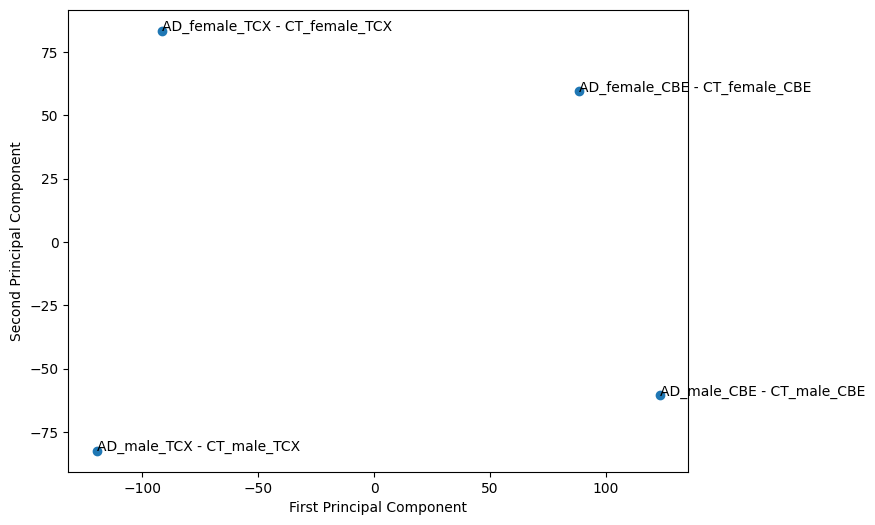

In [207]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)


df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])


df_pca.index = df_pivot.index


plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# labels
for i, comparison in enumerate(df_pca.index):
    plt.annotate(comparison, (df_pca.iloc[i].PC1, df_pca.iloc[i].PC2))

plt.show()